In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten,Dropout, Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error as mse
from functions_learning import *
from feed_data import data_extract
from tensorflow import keras
from keras import layers

## Data Format

In [42]:
data = pd.read_csv("../data/LocationA.csv")
data = data.drop(columns=["Unnamed: 0", "Date"])
data.head()

,TempA,pHA,ECA,DOA,BODA,TNA
0,21.50,7.73,1748,2.55,27.96,1.28
1,21.21,7.82,1765,2.60,27.90,1.08
2,21.21,7.73,1769,2.59,27.88,1.17
3,21.26,7.82,1776,2.63,27.66,1.15
4,21.09,7.76,1822,2.60,27.71,1.22


In [43]:
target_column = "DOA"
features = data.drop(target_column, axis=1)
target = data[target_column]

In [44]:
X = []
y = []
for i in range(3, len(features)):
    X.append(features.iloc[i-3:i, :].values.ravel())  # Flatten features
    y.append(target.iloc[i])

X = np.array(X)
y = np.array(y)

In [45]:
X[0], y[0]

(array([2.150e+01, 7.730e+00, 1.748e+03, 2.796e+01, 1.280e+00, 2.121e+01,
        7.820e+00, 1.765e+03, 2.790e+01, 1.080e+00, 2.121e+01, 7.730e+00,
        1.769e+03, 2.788e+01, 1.170e+00]),
 2.63)

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

In [47]:
xt = x_train.copy()
xt = xt.reshape(231,15,1)
xt.shape

(231, 15, 1)

In [48]:
window_size = 3

def moving_average(data, window_size):
    cumsum = np.cumsum(data, axis=0)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

moving_avg_data = np.apply_along_axis(lambda x: moving_average(x, window_size), axis=0, arr=xt)
target = y_train[window_size - 1:].flatten()

In [49]:
moving_avg_data.shape, target.shape

((229, 15, 1), (229,))

In [50]:
epochs = 30

# General Model

### CNN

In [51]:
x_train = xt.copy()

Epoch 1/30
1/8 [==>...........................] - ETA: 3s - loss: 13758.5430 - root_mean_squared_error: 117.2968

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 115ms/step - loss: 7356.3862 - root_mean_squared_error: 85.7694 - val_loss: 688.8510 - val_root_mean_squared_error: 26.2460
Epoch 2/30
1/8 [==>...........................] - ETA: 0s - loss: 674.4639 - root_mean_squared_error: 25.9704

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 115ms/step - loss: 197.1319 - root_mean_squared_error: 14.0404 - val_loss: 344.4026 - val_root_mean_squared_error: 18.5581
Epoch 3/30
8/8 [==============================] - 0s 12ms/step - loss: 467.9511 - root_mean_squared_error: 21.6322 - val_loss: 434.3280 - val_root_mean_squared_error: 20.8405
Epoch 4/30
1/8 [==>...........................] - ETA: 0s - loss: 410.3102 - root_mean_squared_error: 20.2561

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 119ms/step - loss: 268.9297 - root_mean_squared_error: 16.3991 - val_loss: 62.0174 - val_root_mean_squared_error: 7.8751
Epoch 5/30
1/8 [==>...........................] - ETA: 0s - loss: 62.6572 - root_mean_squared_error: 7.9156

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 135ms/step - loss: 18.5313 - root_mean_squared_error: 4.3048 - val_loss: 17.8351 - val_root_mean_squared_error: 4.2232
Epoch 6/30
8/8 [==============================] - 0s 16ms/step - loss: 35.2042 - root_mean_squared_error: 5.9333 - val_loss: 38.0532 - val_root_mean_squared_error: 6.1687
Epoch 7/30
1/8 [==>...........................] - ETA: 0s - loss: 43.8567 - root_mean_squared_error: 6.6224

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 123ms/step - loss: 27.6772 - root_mean_squared_error: 5.2609 - val_loss: 5.9316 - val_root_mean_squared_error: 2.4355
Epoch 8/30
1/8 [==>...........................] - ETA: 0s - loss: 7.2631 - root_mean_squared_error: 2.6950

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 238ms/step - loss: 3.5305 - root_mean_squared_error: 1.8790 - val_loss: 5.6283 - val_root_mean_squared_error: 2.3724
Epoch 9/30
8/8 [==============================] - 0s 16ms/step - loss: 6.1371 - root_mean_squared_error: 2.4773 - val_loss: 6.1981 - val_root_mean_squared_error: 2.4896
Epoch 10/30
1/8 [==>...........................] - ETA: 0s - loss: 6.4222 - root_mean_squared_error: 2.5342

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 135ms/step - loss: 3.5335 - root_mean_squared_error: 1.8798 - val_loss: 2.1955 - val_root_mean_squared_error: 1.4817
Epoch 11/30
8/8 [==============================] - 0s 9ms/step - loss: 2.1919 - root_mean_squared_error: 1.4805 - val_loss: 2.3990 - val_root_mean_squared_error: 1.5489
Epoch 12/30
1/8 [==>...........................] - ETA: 0s - loss: 3.2330 - root_mean_squared_error: 1.7981

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 123ms/step - loss: 2.4736 - root_mean_squared_error: 1.5728 - val_loss: 2.1186 - val_root_mean_squared_error: 1.4555
Epoch 13/30
8/8 [==============================] - 0s 12ms/step - loss: 2.0622 - root_mean_squared_error: 1.4360 - val_loss: 2.3364 - val_root_mean_squared_error: 1.5285
Epoch 14/30
8/8 [==============================] - 0s 11ms/step - loss: 2.0910 - root_mean_squared_error: 1.4460 - val_loss: 2.2764 - val_root_mean_squared_error: 1.5088
Epoch 15/30
8/8 [==============================] - 0s 11ms/step - loss: 2.0012 - root_mean_squared_error: 1.4146 - val_loss: 2.1296 - val_root_mean_squared_error: 1.4593
Epoch 16/30
1/8 [==>...........................] - ETA: 0s - loss: 1.9608 - root_mean_squared_error: 1.4003

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 125ms/step - loss: 1.9802 - root_mean_squared_error: 1.4072 - val_loss: 2.0631 - val_root_mean_squared_error: 1.4364
Epoch 17/30
8/8 [==============================] - 0s 13ms/step - loss: 1.9791 - root_mean_squared_error: 1.4068 - val_loss: 2.0667 - val_root_mean_squared_error: 1.4376
Epoch 18/30
8/8 [==============================] - 0s 12ms/step - loss: 1.9448 - root_mean_squared_error: 1.3945 - val_loss: 2.0907 - val_root_mean_squared_error: 1.4459
Epoch 19/30
8/8 [==============================] - 0s 13ms/step - loss: 1.9377 - root_mean_squared_error: 1.3920 - val_loss: 2.0908 - val_root_mean_squared_error: 1.4460
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 1.5086 - root_mean_squared_error: 1.2282

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 124ms/step - loss: 1.9344 - root_mean_squared_error: 1.3908 - val_loss: 2.0345 - val_root_mean_squared_error: 1.4264
Epoch 21/30
8/8 [==============================] - 0s 15ms/step - loss: 1.9031 - root_mean_squared_error: 1.3795 - val_loss: 2.0693 - val_root_mean_squared_error: 1.4385
Epoch 22/30
8/8 [==============================] - 0s 13ms/step - loss: 1.9068 - root_mean_squared_error: 1.3809 - val_loss: 2.0492 - val_root_mean_squared_error: 1.4315
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 2.2690 - root_mean_squared_error: 1.5063

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 123ms/step - loss: 1.8785 - root_mean_squared_error: 1.3706 - val_loss: 1.9836 - val_root_mean_squared_error: 1.4084
Epoch 24/30
1/8 [==>...........................] - ETA: 0s - loss: 2.0071 - root_mean_squared_error: 1.4167

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 102ms/step - loss: 1.8810 - root_mean_squared_error: 1.3715 - val_loss: 1.9530 - val_root_mean_squared_error: 1.3975
Epoch 25/30
8/8 [==============================] - 0s 12ms/step - loss: 1.8650 - root_mean_squared_error: 1.3656 - val_loss: 2.0095 - val_root_mean_squared_error: 1.4176
Epoch 26/30
8/8 [==============================] - 0s 23ms/step - loss: 1.8601 - root_mean_squared_error: 1.3639 - val_loss: 1.9679 - val_root_mean_squared_error: 1.4028
Epoch 27/30
1/8 [==>...........................] - ETA: 0s - loss: 1.4886 - root_mean_squared_error: 1.2201

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 185ms/step - loss: 1.8341 - root_mean_squared_error: 1.3543 - val_loss: 1.9322 - val_root_mean_squared_error: 1.3900
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 1.7845 - root_mean_squared_error: 1.3358

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 138ms/step - loss: 1.8188 - root_mean_squared_error: 1.3486 - val_loss: 1.9058 - val_root_mean_squared_error: 1.3805
Epoch 29/30
8/8 [==============================] - 0s 12ms/step - loss: 1.7971 - root_mean_squared_error: 1.3406 - val_loss: 1.9329 - val_root_mean_squared_error: 1.3903
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 1.6261 - root_mean_squared_error: 1.2752

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 0s 2ms/step


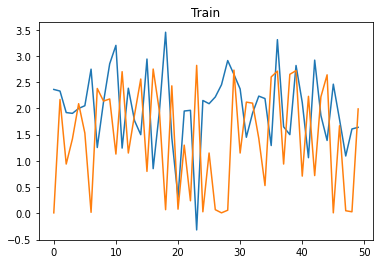

2/2 [==============================] - 0s 4ms/step


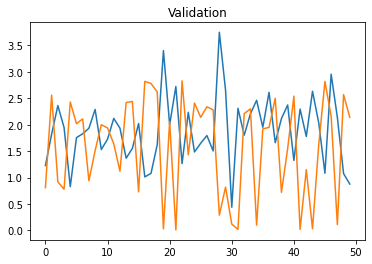

3/3 [==============================] - 0s 4ms/step


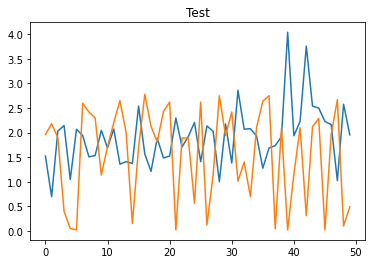

3/3 [==============================] - 0s 4ms/step


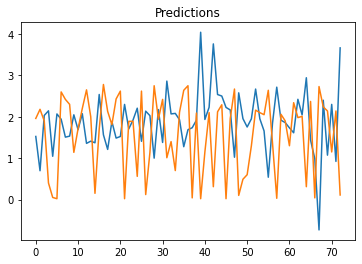

In [52]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))



cp = ModelCheckpoint('cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
cnn_mse = plot_predictions1(model,x_test, y_test)

### GRU

Epoch 1/30
5/8 [=================>............] - ETA: 0s - loss: 7.8597 - root_mean_squared_error: 2.8035 

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 508ms/step - loss: 7.7543 - root_mean_squared_error: 2.7847 - val_loss: 6.5082 - val_root_mean_squared_error: 2.5511
Epoch 2/30
6/8 [=====================>........] - ETA: 0s - loss: 6.6892 - root_mean_squared_error: 2.5864

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 5s 656ms/step - loss: 6.6512 - root_mean_squared_error: 2.5790 - val_loss: 5.5067 - val_root_mean_squared_error: 2.3466
Epoch 3/30
7/8 [=========================>....] - ETA: 0s - loss: 5.6313 - root_mean_squared_error: 2.3730

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 3s 454ms/step - loss: 5.6323 - root_mean_squared_error: 2.3732 - val_loss: 4.6207 - val_root_mean_squared_error: 2.1496
Epoch 4/30
5/8 [=================>............] - ETA: 0s - loss: 4.7983 - root_mean_squared_error: 2.1905

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 3s 443ms/step - loss: 4.7465 - root_mean_squared_error: 2.1786 - val_loss: 3.8435 - val_root_mean_squared_error: 1.9605
Epoch 5/30
5/8 [=================>............] - ETA: 0s - loss: 3.9616 - root_mean_squared_error: 1.9904

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 4s 533ms/step - loss: 3.9650 - root_mean_squared_error: 1.9912 - val_loss: 3.1729 - val_root_mean_squared_error: 1.7813
Epoch 6/30
5/8 [=================>............] - ETA: 0s - loss: 3.2981 - root_mean_squared_error: 1.8161

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 3s 444ms/step - loss: 3.2958 - root_mean_squared_error: 1.8154 - val_loss: 2.6050 - val_root_mean_squared_error: 1.6140
Epoch 7/30
6/8 [=====================>........] - ETA: 0s - loss: 2.7728 - root_mean_squared_error: 1.6652

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 4s 551ms/step - loss: 2.7293 - root_mean_squared_error: 1.6520 - val_loss: 2.1286 - val_root_mean_squared_error: 1.4590
Epoch 8/30
5/8 [=================>............] - ETA: 0s - loss: 2.3475 - root_mean_squared_error: 1.5321

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 3s 462ms/step - loss: 2.2487 - root_mean_squared_error: 1.4996 - val_loss: 1.7417 - val_root_mean_squared_error: 1.3198
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 1.8587 - root_mean_squared_error: 1.3633

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 3s 451ms/step - loss: 1.8587 - root_mean_squared_error: 1.3633 - val_loss: 1.4316 - val_root_mean_squared_error: 1.1965
Epoch 10/30
6/8 [=====================>........] - ETA: 0s - loss: 1.5428 - root_mean_squared_error: 1.2421

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 4s 522ms/step - loss: 1.5382 - root_mean_squared_error: 1.2403 - val_loss: 1.1916 - val_root_mean_squared_error: 1.0916
Epoch 11/30
5/8 [=================>............] - ETA: 0s - loss: 1.3252 - root_mean_squared_error: 1.1512

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 3s 478ms/step - loss: 1.2910 - root_mean_squared_error: 1.1362 - val_loss: 1.0054 - val_root_mean_squared_error: 1.0027
Epoch 12/30
5/8 [=================>............] - ETA: 0s - loss: 1.1674 - root_mean_squared_error: 1.0805

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 4s 508ms/step - loss: 1.0994 - root_mean_squared_error: 1.0485 - val_loss: 0.8635 - val_root_mean_squared_error: 0.9293
Epoch 13/30
6/8 [=====================>........] - ETA: 0s - loss: 0.9427 - root_mean_squared_error: 0.9709

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 3s 452ms/step - loss: 0.9409 - root_mean_squared_error: 0.9700 - val_loss: 0.7633 - val_root_mean_squared_error: 0.8737
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 0.8235 - root_mean_squared_error: 0.9075

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 3s 474ms/step - loss: 0.8340 - root_mean_squared_error: 0.9132 - val_loss: 0.6921 - val_root_mean_squared_error: 0.8319
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 0.7517 - root_mean_squared_error: 0.8670

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 4s 554ms/step - loss: 0.7517 - root_mean_squared_error: 0.8670 - val_loss: 0.6424 - val_root_mean_squared_error: 0.8015
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 0.6873 - root_mean_squared_error: 0.8290

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 4s 635ms/step - loss: 0.6915 - root_mean_squared_error: 0.8316 - val_loss: 0.6106 - val_root_mean_squared_error: 0.7814
Epoch 17/30
6/8 [=====================>........] - ETA: 0s - loss: 0.6794 - root_mean_squared_error: 0.8242

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 5s 678ms/step - loss: 0.6493 - root_mean_squared_error: 0.8058 - val_loss: 0.5896 - val_root_mean_squared_error: 0.7679
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 0.6177 - root_mean_squared_error: 0.7860

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 3s 467ms/step - loss: 0.6177 - root_mean_squared_error: 0.7860 - val_loss: 0.5781 - val_root_mean_squared_error: 0.7603
Epoch 19/30
7/8 [=========================>....] - ETA: 0s - loss: 0.5963 - root_mean_squared_error: 0.7722

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 3s 456ms/step - loss: 0.5986 - root_mean_squared_error: 0.7737 - val_loss: 0.5717 - val_root_mean_squared_error: 0.7561
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 0.5864 - root_mean_squared_error: 0.7658

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 4s 519ms/step - loss: 0.5864 - root_mean_squared_error: 0.7658 - val_loss: 0.5675 - val_root_mean_squared_error: 0.7533
Epoch 21/30
7/8 [=========================>....] - ETA: 0s - loss: 0.5865 - root_mean_squared_error: 0.7658

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 3s 433ms/step - loss: 0.5774 - root_mean_squared_error: 0.7599 - val_loss: 0.5646 - val_root_mean_squared_error: 0.7514
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 0.5690 - root_mean_squared_error: 0.7543

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 4s 523ms/step - loss: 0.5690 - root_mean_squared_error: 0.7543 - val_loss: 0.5625 - val_root_mean_squared_error: 0.7500
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 0.5628 - root_mean_squared_error: 0.7502

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 3s 453ms/step - loss: 0.5628 - root_mean_squared_error: 0.7502 - val_loss: 0.5605 - val_root_mean_squared_error: 0.7487
Epoch 24/30
6/8 [=====================>........] - ETA: 0s - loss: 0.5245 - root_mean_squared_error: 0.7242

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 4s 545ms/step - loss: 0.5573 - root_mean_squared_error: 0.7465 - val_loss: 0.5593 - val_root_mean_squared_error: 0.7478
Epoch 25/30
6/8 [=====================>........] - ETA: 0s - loss: 0.5469 - root_mean_squared_error: 0.7396

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 5s 658ms/step - loss: 0.5526 - root_mean_squared_error: 0.7434 - val_loss: 0.5563 - val_root_mean_squared_error: 0.7459
Epoch 26/30
6/8 [=====================>........] - ETA: 0s - loss: 0.5565 - root_mean_squared_error: 0.7460

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 4s 532ms/step - loss: 0.5481 - root_mean_squared_error: 0.7403 - val_loss: 0.5520 - val_root_mean_squared_error: 0.7429
Epoch 27/30
1/8 [==>...........................] - ETA: 0s - loss: 0.4286 - root_mean_squared_error: 0.6546

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 3s 463ms/step - loss: 0.5433 - root_mean_squared_error: 0.7371 - val_loss: 0.5449 - val_root_mean_squared_error: 0.7381
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 0.5403 - root_mean_squared_error: 0.7351

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 3s 478ms/step - loss: 0.5384 - root_mean_squared_error: 0.7338 - val_loss: 0.5387 - val_root_mean_squared_error: 0.7340
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 0.5052 - root_mean_squared_error: 0.7108

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 2s 334ms/step - loss: 0.5335 - root_mean_squared_error: 0.7304 - val_loss: 0.5334 - val_root_mean_squared_error: 0.7303
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 0.5288 - root_mean_squared_error: 0.7272

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 0s 6ms/step


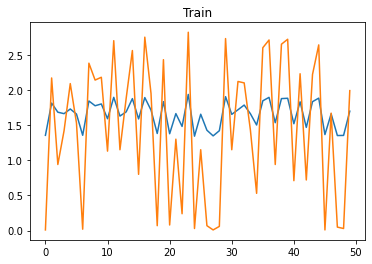

2/2 [==============================] - 0s 4ms/step


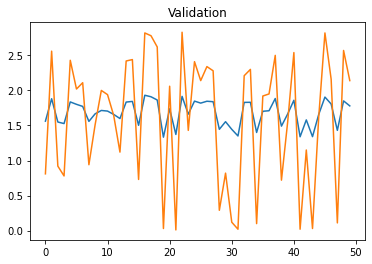

3/3 [==============================] - 0s 6ms/step


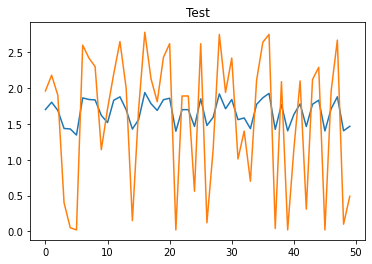

3/3 [==============================] - 0s 5ms/step


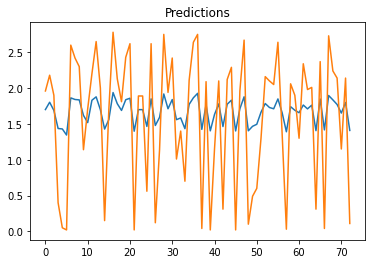

In [53]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(15, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
gru_mse = plot_predictions1(model,x_test, y_test)

### LSTM

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 4.4937 - root_mean_squared_error: 2.1198 

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 5s 520ms/step - loss: 4.4937 - root_mean_squared_error: 2.1198 - val_loss: 3.8485 - val_root_mean_squared_error: 1.9618
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 4.2205 - root_mean_squared_error: 2.0544

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 3s 492ms/step - loss: 4.2205 - root_mean_squared_error: 2.0544 - val_loss: 3.6012 - val_root_mean_squared_error: 1.8977
Epoch 3/30
6/8 [=====================>........] - ETA: 0s - loss: 3.8805 - root_mean_squared_error: 1.9699

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 5s 645ms/step - loss: 3.9503 - root_mean_squared_error: 1.9875 - val_loss: 3.3439 - val_root_mean_squared_error: 1.8286
Epoch 4/30
6/8 [=====================>........] - ETA: 0s - loss: 3.6638 - root_mean_squared_error: 1.9141

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 4s 596ms/step - loss: 3.6534 - root_mean_squared_error: 1.9114 - val_loss: 3.0330 - val_root_mean_squared_error: 1.7415
Epoch 5/30
6/8 [=====================>........] - ETA: 0s - loss: 3.2945 - root_mean_squared_error: 1.8151

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 5s 678ms/step - loss: 3.3895 - root_mean_squared_error: 1.8411 - val_loss: 2.9313 - val_root_mean_squared_error: 1.7121
Epoch 6/30
5/8 [=================>............] - ETA: 0s - loss: 3.2951 - root_mean_squared_error: 1.8153

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 4s 566ms/step - loss: 3.3052 - root_mean_squared_error: 1.8180 - val_loss: 2.8782 - val_root_mean_squared_error: 1.6965
Epoch 7/30
5/8 [=================>............] - ETA: 0s - loss: 3.3006 - root_mean_squared_error: 1.8168

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 4s 613ms/step - loss: 3.2529 - root_mean_squared_error: 1.8036 - val_loss: 2.8308 - val_root_mean_squared_error: 1.6825
Epoch 8/30
6/8 [=====================>........] - ETA: 0s - loss: 3.1990 - root_mean_squared_error: 1.7886

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 3s 493ms/step - loss: 3.2019 - root_mean_squared_error: 1.7894 - val_loss: 2.7848 - val_root_mean_squared_error: 1.6688
Epoch 9/30
6/8 [=====================>........] - ETA: 0s - loss: 3.1032 - root_mean_squared_error: 1.7616

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 4s 542ms/step - loss: 3.1508 - root_mean_squared_error: 1.7750 - val_loss: 2.7370 - val_root_mean_squared_error: 1.6544
Epoch 10/30
5/8 [=================>............] - ETA: 0s - loss: 2.9407 - root_mean_squared_error: 1.7148

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 5s 660ms/step - loss: 3.0947 - root_mean_squared_error: 1.7592 - val_loss: 2.6792 - val_root_mean_squared_error: 1.6368
Epoch 11/30
6/8 [=====================>........] - ETA: 0s - loss: 3.0629 - root_mean_squared_error: 1.7501

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 4s 635ms/step - loss: 3.0285 - root_mean_squared_error: 1.7402 - val_loss: 2.6179 - val_root_mean_squared_error: 1.6180
Epoch 12/30
6/8 [=====================>........] - ETA: 0s - loss: 2.8794 - root_mean_squared_error: 1.6969

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 4s 598ms/step - loss: 2.9618 - root_mean_squared_error: 1.7210 - val_loss: 2.5578 - val_root_mean_squared_error: 1.5993
Epoch 13/30
5/8 [=================>............] - ETA: 0s - loss: 2.9925 - root_mean_squared_error: 1.7299

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 4s 576ms/step - loss: 2.8942 - root_mean_squared_error: 1.7012 - val_loss: 2.4968 - val_root_mean_squared_error: 1.5801
Epoch 14/30
6/8 [=====================>........] - ETA: 0s - loss: 2.8235 - root_mean_squared_error: 1.6803

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 5s 682ms/step - loss: 2.8298 - root_mean_squared_error: 1.6822 - val_loss: 2.4395 - val_root_mean_squared_error: 1.5619
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 2.7650 - root_mean_squared_error: 1.6628

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 4s 510ms/step - loss: 2.7650 - root_mean_squared_error: 1.6628 - val_loss: 2.3763 - val_root_mean_squared_error: 1.5415
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 2.6895 - root_mean_squared_error: 1.6400

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 4s 530ms/step - loss: 2.6895 - root_mean_squared_error: 1.6400 - val_loss: 2.3077 - val_root_mean_squared_error: 1.5191
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 2.5553 - root_mean_squared_error: 1.5985

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 3s 433ms/step - loss: 2.6186 - root_mean_squared_error: 1.6182 - val_loss: 2.2462 - val_root_mean_squared_error: 1.4987
Epoch 18/30
1/8 [==>...........................] - ETA: 0s - loss: 3.3238 - root_mean_squared_error: 1.8231

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 3s 426ms/step - loss: 2.5514 - root_mean_squared_error: 1.5973 - val_loss: 2.1846 - val_root_mean_squared_error: 1.4780
Epoch 19/30
1/8 [==>...........................] - ETA: 0s - loss: 2.2123 - root_mean_squared_error: 1.4874

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 3s 484ms/step - loss: 2.4804 - root_mean_squared_error: 1.5749 - val_loss: 2.1232 - val_root_mean_squared_error: 1.4571
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 2.4713 - root_mean_squared_error: 1.5720

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 3s 444ms/step - loss: 2.4125 - root_mean_squared_error: 1.5532 - val_loss: 2.0586 - val_root_mean_squared_error: 1.4348
Epoch 21/30
1/8 [==>...........................] - ETA: 0s - loss: 2.3519 - root_mean_squared_error: 1.5336

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 4s 538ms/step - loss: 2.3388 - root_mean_squared_error: 1.5293 - val_loss: 1.9934 - val_root_mean_squared_error: 1.4119
Epoch 22/30
1/8 [==>...........................] - ETA: 0s - loss: 2.7592 - root_mean_squared_error: 1.6611

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 3s 483ms/step - loss: 2.2656 - root_mean_squared_error: 1.5052 - val_loss: 1.9291 - val_root_mean_squared_error: 1.3889
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 2.2677 - root_mean_squared_error: 1.5059

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 6s 794ms/step - loss: 2.1911 - root_mean_squared_error: 1.4802 - val_loss: 1.8600 - val_root_mean_squared_error: 1.3638
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 2.1134 - root_mean_squared_error: 1.4537

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 4s 534ms/step - loss: 2.1134 - root_mean_squared_error: 1.4537 - val_loss: 1.7900 - val_root_mean_squared_error: 1.3379
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 2.0342 - root_mean_squared_error: 1.4263

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 4s 602ms/step - loss: 2.0342 - root_mean_squared_error: 1.4263 - val_loss: 1.7209 - val_root_mean_squared_error: 1.3118
Epoch 26/30
4/8 [==============>...............] - ETA: 0s - loss: 1.9008 - root_mean_squared_error: 1.3787

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 4s 553ms/step - loss: 1.9552 - root_mean_squared_error: 1.3983 - val_loss: 1.6527 - val_root_mean_squared_error: 1.2856
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 1.8807 - root_mean_squared_error: 1.3714

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 4s 513ms/step - loss: 1.8807 - root_mean_squared_error: 1.3714 - val_loss: 1.5887 - val_root_mean_squared_error: 1.2604
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 1.7962 - root_mean_squared_error: 1.3402

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 4s 617ms/step - loss: 1.8060 - root_mean_squared_error: 1.3439 - val_loss: 1.5240 - val_root_mean_squared_error: 1.2345
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 1.7286 - root_mean_squared_error: 1.3148

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 4s 564ms/step - loss: 1.7286 - root_mean_squared_error: 1.3148 - val_loss: 1.4498 - val_root_mean_squared_error: 1.2041
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 1.6713 - root_mean_squared_error: 1.2928

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 0s 3ms/step


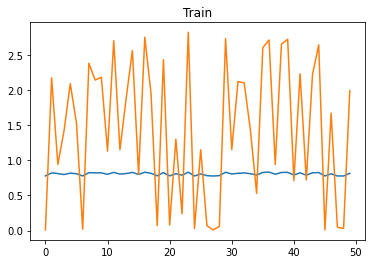

2/2 [==============================] - 0s 5ms/step


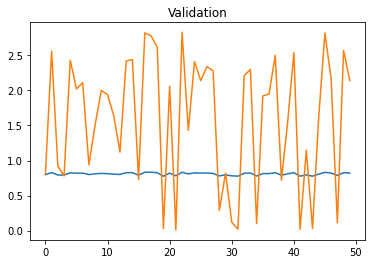

3/3 [==============================] - 0s 4ms/step


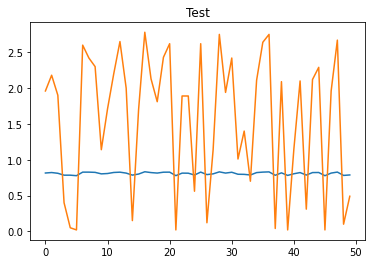

3/3 [==============================] - 0s 4ms/step


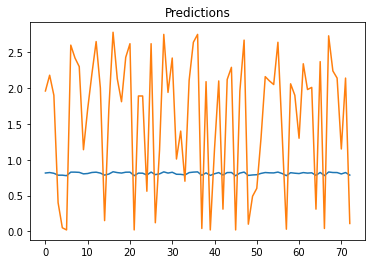

In [54]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
lstm_mse = plot_predictions1(model,x_test, y_test)

### RNN

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 0.6713 - root_mean_squared_error: 0.8193INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 3s 326ms/step - loss: 0.6713 - root_mean_squared_error: 0.8193 - val_loss: 0.6205 - val_root_mean_squared_error: 0.7877
Epoch 2/30
5/8 [=================>............] - ETA: 0s - loss: 0.5712 - root_mean_squared_error: 0.7558INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 2s 223ms/step - loss: 0.5990 - root_mean_squared_error: 0.7739 - val_loss: 0.5980 - val_root_mean_squared_error: 0.7733
Epoch 3/30
1/8 [==>...........................] - ETA: 0s - loss: 0.8641 - root_mean_squared_error: 0.9296INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 2s 217ms/step - loss: 0.5664 - root_mean_squared_error: 0.7526 - val_loss: 0.5503 - val_root_mean_squared_error: 0.7418
Epoch 4/30
1/8 [==>...........................] - ETA: 0s - loss: 0.5234 - root_mean_squared_error: 0.7234INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 1s 211ms/step - loss: 0.5287 - root_mean_squared_error: 0.7271 - val_loss: 0.5102 - val_root_mean_squared_error: 0.7143
Epoch 5/30
1/8 [==>...........................] - ETA: 0s - loss: 0.6472 - root_mean_squared_error: 0.8045INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 2s 278ms/step - loss: 0.4982 - root_mean_squared_error: 0.7058 - val_loss: 0.4721 - val_root_mean_squared_error: 0.6871
Epoch 6/30
1/8 [==>...........................] - ETA: 0s - loss: 0.3860 - root_mean_squared_error: 0.6213INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 2s 214ms/step - loss: 0.4656 - root_mean_squared_error: 0.6824 - val_loss: 0.4459 - val_root_mean_squared_error: 0.6677
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 0.4358 - root_mean_squared_error: 0.6602INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 2s 214ms/step - loss: 0.4358 - root_mean_squared_error: 0.6602 - val_loss: 0.4111 - val_root_mean_squared_error: 0.6412
Epoch 8/30
1/8 [==>...........................] - ETA: 0s - loss: 0.3735 - root_mean_squared_error: 0.6111INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 2s 214ms/step - loss: 0.4097 - root_mean_squared_error: 0.6401 - val_loss: 0.3872 - val_root_mean_squared_error: 0.6223
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 0.3840 - root_mean_squared_error: 0.6197INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 1s 209ms/step - loss: 0.3840 - root_mean_squared_error: 0.6197 - val_loss: 0.3604 - val_root_mean_squared_error: 0.6003
Epoch 10/30
1/8 [==>...........................] - ETA: 0s - loss: 0.3220 - root_mean_squared_error: 0.5674INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 2s 257ms/step - loss: 0.3612 - root_mean_squared_error: 0.6010 - val_loss: 0.3393 - val_root_mean_squared_error: 0.5825
Epoch 11/30
1/8 [==>...........................] - ETA: 0s - loss: 0.4122 - root_mean_squared_error: 0.6420INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 1s 210ms/step - loss: 0.3396 - root_mean_squared_error: 0.5828 - val_loss: 0.3249 - val_root_mean_squared_error: 0.5700
Epoch 12/30
1/8 [==>...........................] - ETA: 0s - loss: 0.2810 - root_mean_squared_error: 0.5301INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 1s 208ms/step - loss: 0.3210 - root_mean_squared_error: 0.5666 - val_loss: 0.3022 - val_root_mean_squared_error: 0.5497
Epoch 13/30
7/8 [=========================>....] - ETA: 0s - loss: 0.3020 - root_mean_squared_error: 0.5495INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 1s 204ms/step - loss: 0.3015 - root_mean_squared_error: 0.5491 - val_loss: 0.2799 - val_root_mean_squared_error: 0.5290
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 0.2280 - root_mean_squared_error: 0.4775INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 2s 234ms/step - loss: 0.2837 - root_mean_squared_error: 0.5327 - val_loss: 0.2608 - val_root_mean_squared_error: 0.5107
Epoch 15/30
1/8 [==>...........................] - ETA: 0s - loss: 0.2528 - root_mean_squared_error: 0.5028INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 2s 252ms/step - loss: 0.2669 - root_mean_squared_error: 0.5166 - val_loss: 0.2472 - val_root_mean_squared_error: 0.4972
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 0.2512 - root_mean_squared_error: 0.5012INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 1s 203ms/step - loss: 0.2512 - root_mean_squared_error: 0.5012 - val_loss: 0.2299 - val_root_mean_squared_error: 0.4795
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 0.1691 - root_mean_squared_error: 0.4113INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 2s 256ms/step - loss: 0.2366 - root_mean_squared_error: 0.4865 - val_loss: 0.2176 - val_root_mean_squared_error: 0.4664
Epoch 18/30
1/8 [==>...........................] - ETA: 0s - loss: 0.1468 - root_mean_squared_error: 0.3832INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 2s 230ms/step - loss: 0.2226 - root_mean_squared_error: 0.4718 - val_loss: 0.2002 - val_root_mean_squared_error: 0.4475
Epoch 19/30
1/8 [==>...........................] - ETA: 0s - loss: 0.2151 - root_mean_squared_error: 0.4638INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 2s 264ms/step - loss: 0.2096 - root_mean_squared_error: 0.4578 - val_loss: 0.1880 - val_root_mean_squared_error: 0.4336
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 0.2993 - root_mean_squared_error: 0.5470INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 1s 197ms/step - loss: 0.1979 - root_mean_squared_error: 0.4449 - val_loss: 0.1798 - val_root_mean_squared_error: 0.4241
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 0.1852 - root_mean_squared_error: 0.4304INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 2s 281ms/step - loss: 0.1852 - root_mean_squared_error: 0.4304 - val_loss: 0.1636 - val_root_mean_squared_error: 0.4045
Epoch 22/30
1/8 [==>...........................] - ETA: 0s - loss: 0.1766 - root_mean_squared_error: 0.4203INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 1s 209ms/step - loss: 0.1742 - root_mean_squared_error: 0.4173 - val_loss: 0.1525 - val_root_mean_squared_error: 0.3905
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 0.1784 - root_mean_squared_error: 0.4224INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 2s 233ms/step - loss: 0.1640 - root_mean_squared_error: 0.4049 - val_loss: 0.1450 - val_root_mean_squared_error: 0.3808
Epoch 24/30
1/8 [==>...........................] - ETA: 0s - loss: 0.1434 - root_mean_squared_error: 0.3787INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 1s 167ms/step - loss: 0.1551 - root_mean_squared_error: 0.3939 - val_loss: 0.1346 - val_root_mean_squared_error: 0.3669
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 0.1445 - root_mean_squared_error: 0.3802INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 1s 205ms/step - loss: 0.1450 - root_mean_squared_error: 0.3808 - val_loss: 0.1229 - val_root_mean_squared_error: 0.3506
Epoch 26/30
1/8 [==>...........................] - ETA: 0s - loss: 0.1328 - root_mean_squared_error: 0.3644INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 2s 259ms/step - loss: 0.1372 - root_mean_squared_error: 0.3704 - val_loss: 0.1168 - val_root_mean_squared_error: 0.3418
Epoch 27/30
1/8 [==>...........................] - ETA: 0s - loss: 0.1402 - root_mean_squared_error: 0.3744INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 2s 220ms/step - loss: 0.1290 - root_mean_squared_error: 0.3592 - val_loss: 0.1077 - val_root_mean_squared_error: 0.3282
Epoch 28/30
1/8 [==>...........................] - ETA: 0s - loss: 0.1056 - root_mean_squared_error: 0.3250INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 2s 241ms/step - loss: 0.1200 - root_mean_squared_error: 0.3464 - val_loss: 0.0985 - val_root_mean_squared_error: 0.3138
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 0.1339 - root_mean_squared_error: 0.3660INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 1s 165ms/step - loss: 0.1137 - root_mean_squared_error: 0.3372 - val_loss: 0.0911 - val_root_mean_squared_error: 0.3018
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 0.1307 - root_mean_squared_error: 0.3615INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 0s 3ms/step


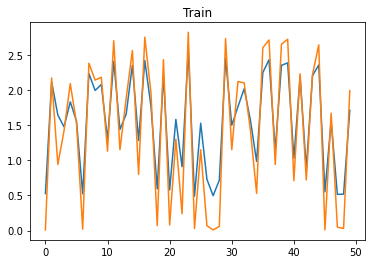

2/2 [==============================] - 0s 4ms/step


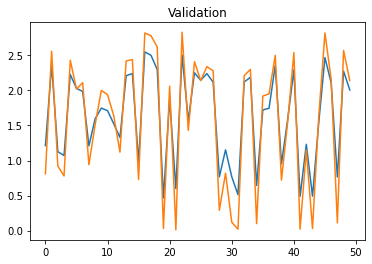

3/3 [==============================] - 0s 5ms/step


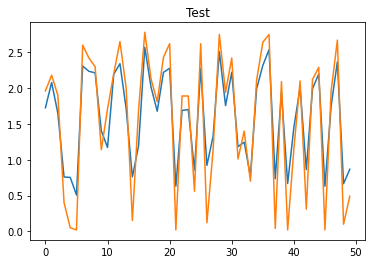

3/3 [==============================] - 0s 3ms/step


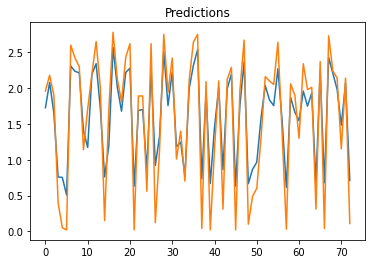

In [55]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(15, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
rnn_mse = plot_predictions1(model,x_test, y_test)

# Moving Average

In [56]:
window_size = 3

def moving_average(data, window_size):
    cumsum = np.cumsum(data, axis=0)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

moving_avg_data = np.apply_along_axis(lambda x: moving_average(x, window_size), axis=0, arr=x_train)
target = y_train[window_size - 1:].flatten()

#### CNN

Epoch 1/30
1/8 [==>...........................] - ETA: 2s - loss: 121.2870 - root_mean_squared_error: 11.0130

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 120ms/step - loss: 52.3589 - root_mean_squared_error: 7.2359 - val_loss: 19.9684 - val_root_mean_squared_error: 4.4686
Epoch 2/30
8/8 [==============================] - 0s 11ms/step - loss: 15.6683 - root_mean_squared_error: 3.9583 - val_loss: 23.3179 - val_root_mean_squared_error: 4.8289
Epoch 3/30
1/8 [==>...........................] - ETA: 0s - loss: 14.4197 - root_mean_squared_error: 3.7973

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 100ms/step - loss: 10.6467 - root_mean_squared_error: 3.2629 - val_loss: 19.6783 - val_root_mean_squared_error: 4.4360
Epoch 4/30
1/8 [==>...........................] - ETA: 0s - loss: 5.8392 - root_mean_squared_error: 2.4165

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 107ms/step - loss: 6.8255 - root_mean_squared_error: 2.6126 - val_loss: 18.4323 - val_root_mean_squared_error: 4.2933
Epoch 5/30
1/8 [==>...........................] - ETA: 0s - loss: 6.1660 - root_mean_squared_error: 2.4831

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 102ms/step - loss: 6.5123 - root_mean_squared_error: 2.5519 - val_loss: 17.2596 - val_root_mean_squared_error: 4.1545
Epoch 6/30
8/8 [==============================] - 0s 13ms/step - loss: 5.6646 - root_mean_squared_error: 2.3800 - val_loss: 17.7784 - val_root_mean_squared_error: 4.2164
Epoch 7/30
1/8 [==>...........................] - ETA: 0s - loss: 6.2915 - root_mean_squared_error: 2.5083

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 128ms/step - loss: 5.6949 - root_mean_squared_error: 2.3864 - val_loss: 15.7394 - val_root_mean_squared_error: 3.9673
Epoch 8/30
1/8 [==>...........................] - ETA: 0s - loss: 5.5548 - root_mean_squared_error: 2.3569

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 97ms/step - loss: 5.5957 - root_mean_squared_error: 2.3655 - val_loss: 14.6846 - val_root_mean_squared_error: 3.8321
Epoch 9/30
1/8 [==>...........................] - ETA: 0s - loss: 7.2020 - root_mean_squared_error: 2.6837

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 77ms/step - loss: 5.3295 - root_mean_squared_error: 2.3086 - val_loss: 14.6105 - val_root_mean_squared_error: 3.8224
Epoch 10/30
8/8 [==============================] - 0s 7ms/step - loss: 5.2190 - root_mean_squared_error: 2.2845 - val_loss: 19.1021 - val_root_mean_squared_error: 4.3706
Epoch 11/30
8/8 [==============================] - 0s 7ms/step - loss: 7.5023 - root_mean_squared_error: 2.7390 - val_loss: 14.7890 - val_root_mean_squared_error: 3.8456
Epoch 12/30
1/8 [==>...........................] - ETA: 0s - loss: 5.9400 - root_mean_squared_error: 2.4372

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 83ms/step - loss: 5.0434 - root_mean_squared_error: 2.2458 - val_loss: 11.8299 - val_root_mean_squared_error: 3.4395
Epoch 13/30
8/8 [==============================] - 0s 9ms/step - loss: 4.2488 - root_mean_squared_error: 2.0613 - val_loss: 13.5517 - val_root_mean_squared_error: 3.6813
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 7.3236 - root_mean_squared_error: 2.7062

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 95ms/step - loss: 5.0574 - root_mean_squared_error: 2.2489 - val_loss: 11.2227 - val_root_mean_squared_error: 3.3500
Epoch 15/30
1/8 [==>...........................] - ETA: 0s - loss: 4.8895 - root_mean_squared_error: 2.2112

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 137ms/step - loss: 4.8859 - root_mean_squared_error: 2.2104 - val_loss: 9.2047 - val_root_mean_squared_error: 3.0339
Epoch 16/30
8/8 [==============================] - 0s 9ms/step - loss: 3.5133 - root_mean_squared_error: 1.8744 - val_loss: 9.5600 - val_root_mean_squared_error: 3.0919
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 3.2368 - root_mean_squared_error: 1.7991

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 105ms/step - loss: 3.3417 - root_mean_squared_error: 1.8280 - val_loss: 7.8857 - val_root_mean_squared_error: 2.8082
Epoch 18/30
1/8 [==>...........................] - ETA: 0s - loss: 4.7241 - root_mean_squared_error: 2.1735

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 98ms/step - loss: 2.9643 - root_mean_squared_error: 1.7217 - val_loss: 7.8807 - val_root_mean_squared_error: 2.8073
Epoch 19/30
1/8 [==>...........................] - ETA: 0s - loss: 3.2061 - root_mean_squared_error: 1.7906

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 115ms/step - loss: 2.8281 - root_mean_squared_error: 1.6817 - val_loss: 6.7737 - val_root_mean_squared_error: 2.6026
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 2.6912 - root_mean_squared_error: 1.6405

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 125ms/step - loss: 2.5301 - root_mean_squared_error: 1.5906 - val_loss: 6.3973 - val_root_mean_squared_error: 2.5293
Epoch 21/30
1/8 [==>...........................] - ETA: 0s - loss: 2.6646 - root_mean_squared_error: 1.6324

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 104ms/step - loss: 2.3003 - root_mean_squared_error: 1.5167 - val_loss: 5.8225 - val_root_mean_squared_error: 2.4130
Epoch 22/30
1/8 [==>...........................] - ETA: 0s - loss: 1.6002 - root_mean_squared_error: 1.2650

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 116ms/step - loss: 2.2277 - root_mean_squared_error: 1.4925 - val_loss: 5.2967 - val_root_mean_squared_error: 2.3015
Epoch 23/30
8/8 [==============================] - 0s 8ms/step - loss: 1.9911 - root_mean_squared_error: 1.4111 - val_loss: 5.3300 - val_root_mean_squared_error: 2.3087
Epoch 24/30
8/8 [==============================] - 0s 8ms/step - loss: 2.1509 - root_mean_squared_error: 1.4666 - val_loss: 5.9097 - val_root_mean_squared_error: 2.4310
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 2.6993 - root_mean_squared_error: 1.6430

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 106ms/step - loss: 2.6591 - root_mean_squared_error: 1.6307 - val_loss: 4.7224 - val_root_mean_squared_error: 2.1731
Epoch 26/30
1/8 [==>...........................] - ETA: 0s - loss: 2.8487 - root_mean_squared_error: 1.6878

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 85ms/step - loss: 2.4896 - root_mean_squared_error: 1.5778 - val_loss: 4.3103 - val_root_mean_squared_error: 2.0761
Epoch 27/30
8/8 [==============================] - 0s 8ms/step - loss: 2.0561 - root_mean_squared_error: 1.4339 - val_loss: 4.3991 - val_root_mean_squared_error: 2.0974
Epoch 28/30
1/8 [==>...........................] - ETA: 0s - loss: 3.3186 - root_mean_squared_error: 1.8217

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 99ms/step - loss: 2.4206 - root_mean_squared_error: 1.5558 - val_loss: 4.0956 - val_root_mean_squared_error: 2.0238
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 2.2083 - root_mean_squared_error: 1.4860

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 87ms/step - loss: 1.7185 - root_mean_squared_error: 1.3109 - val_loss: 3.8437 - val_root_mean_squared_error: 1.9605
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 2.1088 - root_mean_squared_error: 1.4522

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 0s 3ms/step


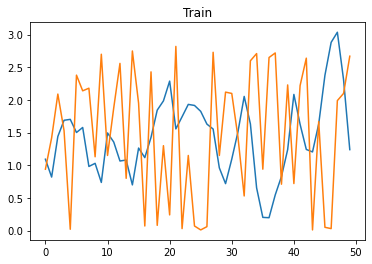

2/2 [==============================] - 0s 2ms/step


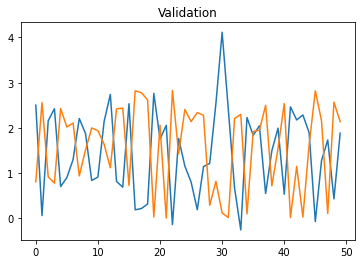

3/3 [==============================] - 0s 3ms/step


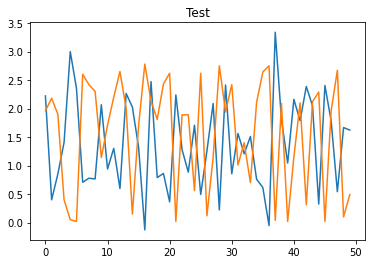

3/3 [==============================] - 0s 2ms/step


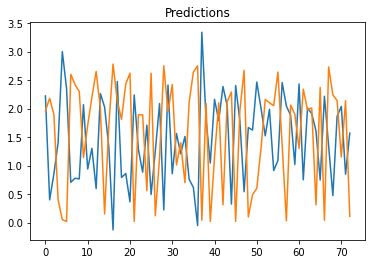

In [57]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_cnn_mse = plot_predictions1(model,x_test, y_test)

#### GRU

Epoch 1/30
5/8 [=================>............] - ETA: 0s - loss: 2.9667 - root_mean_squared_error: 1.7224 

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 6s 548ms/step - loss: 2.8779 - root_mean_squared_error: 1.6964 - val_loss: 2.1639 - val_root_mean_squared_error: 1.4710
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 2.2577 - root_mean_squared_error: 1.5026

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 4s 537ms/step - loss: 2.2491 - root_mean_squared_error: 1.4997 - val_loss: 1.6748 - val_root_mean_squared_error: 1.2942
Epoch 3/30
5/8 [=================>............] - ETA: 0s - loss: 1.8764 - root_mean_squared_error: 1.3698

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 3s 493ms/step - loss: 1.7432 - root_mean_squared_error: 1.3203 - val_loss: 1.3192 - val_root_mean_squared_error: 1.1486
Epoch 4/30
5/8 [=================>............] - ETA: 0s - loss: 1.3997 - root_mean_squared_error: 1.1831

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 4s 538ms/step - loss: 1.3703 - root_mean_squared_error: 1.1706 - val_loss: 1.0776 - val_root_mean_squared_error: 1.0381
Epoch 5/30
6/8 [=====================>........] - ETA: 0s - loss: 1.0881 - root_mean_squared_error: 1.0431

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 3s 479ms/step - loss: 1.1115 - root_mean_squared_error: 1.0543 - val_loss: 0.9300 - val_root_mean_squared_error: 0.9643
Epoch 6/30
5/8 [=================>............] - ETA: 0s - loss: 0.9605 - root_mean_squared_error: 0.9801

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 4s 566ms/step - loss: 0.9531 - root_mean_squared_error: 0.9763 - val_loss: 0.8555 - val_root_mean_squared_error: 0.9249
Epoch 7/30
6/8 [=====================>........] - ETA: 0s - loss: 0.8836 - root_mean_squared_error: 0.9400

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 4s 568ms/step - loss: 0.8615 - root_mean_squared_error: 0.9282 - val_loss: 0.8287 - val_root_mean_squared_error: 0.9103
Epoch 8/30
7/8 [=========================>....] - ETA: 0s - loss: 0.8115 - root_mean_squared_error: 0.9008

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 3s 482ms/step - loss: 0.8253 - root_mean_squared_error: 0.9085 - val_loss: 0.8206 - val_root_mean_squared_error: 0.9059
Epoch 9/30
8/8 [==============================] - 0s 17ms/step - loss: 0.8009 - root_mean_squared_error: 0.8949 - val_loss: 0.8209 - val_root_mean_squared_error: 0.9061
Epoch 10/30
8/8 [==============================] - 0s 18ms/step - loss: 0.7952 - root_mean_squared_error: 0.8917 - val_loss: 0.8274 - val_root_mean_squared_error: 0.9096
Epoch 11/30
8/8 [==============================] - 0s 18ms/step - loss: 0.7880 - root_mean_squared_error: 0.8877 - val_loss: 0.8288 - val_root_mean_squared_error: 0.9104
Epoch 12/30
8/8 [==============================] - 0s 18ms/step - loss: 0.7864 - root_mean_squared_error: 0.8868 - val_loss: 0.8302 - val_root_mean_squared_error: 0.9111
Epoch 13/30
8/8 [==============================] - 0s 16ms/step - loss: 0.7863 - root_mean_squared_error: 0.8867 - val_loss: 0.8295 - val_root_mean_squared_error:

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 4s 500ms/step - loss: 0.7836 - root_mean_squared_error: 0.8852 - val_loss: 0.8122 - val_root_mean_squared_error: 0.9012
Epoch 17/30
5/8 [=================>............] - ETA: 0s - loss: 0.7703 - root_mean_squared_error: 0.8776

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 4s 591ms/step - loss: 0.7830 - root_mean_squared_error: 0.8849 - val_loss: 0.8041 - val_root_mean_squared_error: 0.8967
Epoch 18/30
5/8 [=================>............] - ETA: 0s - loss: 0.8577 - root_mean_squared_error: 0.9261

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 3s 469ms/step - loss: 0.7816 - root_mean_squared_error: 0.8841 - val_loss: 0.8019 - val_root_mean_squared_error: 0.8955
Epoch 19/30
8/8 [==============================] - 0s 14ms/step - loss: 0.7822 - root_mean_squared_error: 0.8844 - val_loss: 0.8051 - val_root_mean_squared_error: 0.8973
Epoch 20/30
4/8 [==============>...............] - ETA: 0s - loss: 0.7442 - root_mean_squared_error: 0.8627

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 3s 443ms/step - loss: 0.7790 - root_mean_squared_error: 0.8826 - val_loss: 0.7988 - val_root_mean_squared_error: 0.8937
Epoch 21/30
7/8 [=========================>....] - ETA: 0s - loss: 0.7789 - root_mean_squared_error: 0.8826

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 2s 341ms/step - loss: 0.7784 - root_mean_squared_error: 0.8823 - val_loss: 0.7918 - val_root_mean_squared_error: 0.8898
Epoch 22/30
1/8 [==>...........................] - ETA: 0s - loss: 0.6559 - root_mean_squared_error: 0.8099

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 2s 326ms/step - loss: 0.7774 - root_mean_squared_error: 0.8817 - val_loss: 0.7890 - val_root_mean_squared_error: 0.8883
Epoch 23/30
6/8 [=====================>........] - ETA: 0s - loss: 0.7674 - root_mean_squared_error: 0.8760

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 3s 438ms/step - loss: 0.7762 - root_mean_squared_error: 0.8810 - val_loss: 0.7879 - val_root_mean_squared_error: 0.8876
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 0.7750 - root_mean_squared_error: 0.8803

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 2s 327ms/step - loss: 0.7750 - root_mean_squared_error: 0.8803 - val_loss: 0.7822 - val_root_mean_squared_error: 0.8844
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 0.8207 - root_mean_squared_error: 0.9059

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 3s 379ms/step - loss: 0.7739 - root_mean_squared_error: 0.8797 - val_loss: 0.7793 - val_root_mean_squared_error: 0.8828
Epoch 26/30
1/8 [==>...........................] - ETA: 0s - loss: 0.7879 - root_mean_squared_error: 0.8876

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 2s 327ms/step - loss: 0.7724 - root_mean_squared_error: 0.8789 - val_loss: 0.7776 - val_root_mean_squared_error: 0.8818
Epoch 27/30
1/8 [==>...........................] - ETA: 0s - loss: 0.7943 - root_mean_squared_error: 0.8912

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 2s 330ms/step - loss: 0.7711 - root_mean_squared_error: 0.8781 - val_loss: 0.7770 - val_root_mean_squared_error: 0.8815
Epoch 28/30
1/8 [==>...........................] - ETA: 0s - loss: 0.6318 - root_mean_squared_error: 0.7948

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 3s 405ms/step - loss: 0.7711 - root_mean_squared_error: 0.8781 - val_loss: 0.7744 - val_root_mean_squared_error: 0.8800
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 0.9946 - root_mean_squared_error: 0.9973

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 2s 315ms/step - loss: 0.7697 - root_mean_squared_error: 0.8773 - val_loss: 0.7645 - val_root_mean_squared_error: 0.8744
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 0.8047 - root_mean_squared_error: 0.8971

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 0s 3ms/step


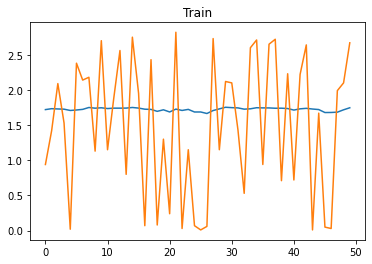

2/2 [==============================] - 0s 4ms/step


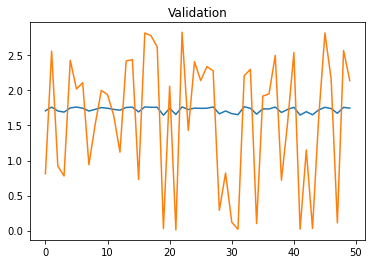

3/3 [==============================] - 0s 3ms/step


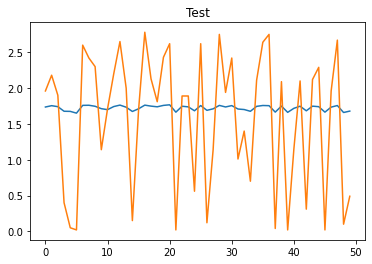

3/3 [==============================] - 0s 3ms/step


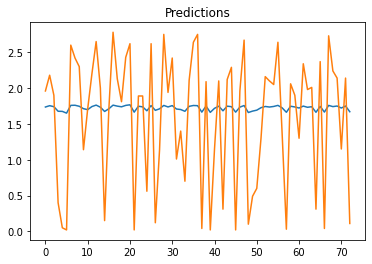

In [58]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(15, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_gru/', save_best_only=True)
model = fit_model(model, cp, epochs,  moving_avg_data, target, x_val, y_val)

plot_train("mavg_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_gru_mse = plot_predictions1(model,x_test, y_test)

#### LSTM

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 4.0706 - root_mean_squared_error: 2.0176

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 5s 503ms/step - loss: 4.0706 - root_mean_squared_error: 2.0176 - val_loss: 3.3577 - val_root_mean_squared_error: 1.8324
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 3.7049 - root_mean_squared_error: 1.9248

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 3s 401ms/step - loss: 3.6753 - root_mean_squared_error: 1.9171 - val_loss: 3.0156 - val_root_mean_squared_error: 1.7366
Epoch 3/30
6/8 [=====================>........] - ETA: 0s - loss: 3.2951 - root_mean_squared_error: 1.8152

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 3s 457ms/step - loss: 3.3265 - root_mean_squared_error: 1.8239 - val_loss: 2.7854 - val_root_mean_squared_error: 1.6690
Epoch 4/30
6/8 [=====================>........] - ETA: 0s - loss: 3.1904 - root_mean_squared_error: 1.7862

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 3s 371ms/step - loss: 3.1356 - root_mean_squared_error: 1.7708 - val_loss: 2.6524 - val_root_mean_squared_error: 1.6286
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 2.9823 - root_mean_squared_error: 1.7269

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 3s 359ms/step - loss: 2.9823 - root_mean_squared_error: 1.7269 - val_loss: 2.5027 - val_root_mean_squared_error: 1.5820
Epoch 6/30
1/8 [==>...........................] - ETA: 0s - loss: 2.3783 - root_mean_squared_error: 1.5422

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 3s 430ms/step - loss: 2.8098 - root_mean_squared_error: 1.6762 - val_loss: 2.3456 - val_root_mean_squared_error: 1.5315
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 2.6433 - root_mean_squared_error: 1.6258

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 3s 382ms/step - loss: 2.6433 - root_mean_squared_error: 1.6258 - val_loss: 2.2052 - val_root_mean_squared_error: 1.4850
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 2.4953 - root_mean_squared_error: 1.5796

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 3s 418ms/step - loss: 2.4953 - root_mean_squared_error: 1.5796 - val_loss: 2.0790 - val_root_mean_squared_error: 1.4419
Epoch 9/30
7/8 [=========================>....] - ETA: 0s - loss: 2.3675 - root_mean_squared_error: 1.5387

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 3s 363ms/step - loss: 2.3568 - root_mean_squared_error: 1.5352 - val_loss: 1.9595 - val_root_mean_squared_error: 1.3998
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 2.2209 - root_mean_squared_error: 1.4903

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 3s 425ms/step - loss: 2.2209 - root_mean_squared_error: 1.4903 - val_loss: 1.8438 - val_root_mean_squared_error: 1.3579
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 2.0808 - root_mean_squared_error: 1.4425

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 3s 371ms/step - loss: 2.0923 - root_mean_squared_error: 1.4465 - val_loss: 1.7329 - val_root_mean_squared_error: 1.3164
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 1.9708 - root_mean_squared_error: 1.4038

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 3s 424ms/step - loss: 1.9708 - root_mean_squared_error: 1.4038 - val_loss: 1.6281 - val_root_mean_squared_error: 1.2760
Epoch 13/30
7/8 [=========================>....] - ETA: 0s - loss: 1.8737 - root_mean_squared_error: 1.3688

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 3s 411ms/step - loss: 1.8582 - root_mean_squared_error: 1.3632 - val_loss: 1.5306 - val_root_mean_squared_error: 1.2372
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 2.0236 - root_mean_squared_error: 1.4225

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 3s 432ms/step - loss: 1.7472 - root_mean_squared_error: 1.3218 - val_loss: 1.4435 - val_root_mean_squared_error: 1.2015
Epoch 15/30
1/8 [==>...........................] - ETA: 0s - loss: 1.7137 - root_mean_squared_error: 1.3091

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 3s 364ms/step - loss: 1.6496 - root_mean_squared_error: 1.2844 - val_loss: 1.3604 - val_root_mean_squared_error: 1.1664
Epoch 16/30
1/8 [==>...........................] - ETA: 0s - loss: 1.5329 - root_mean_squared_error: 1.2381

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 3s 420ms/step - loss: 1.5540 - root_mean_squared_error: 1.2466 - val_loss: 1.2803 - val_root_mean_squared_error: 1.1315
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 1.1033 - root_mean_squared_error: 1.0504

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 3s 371ms/step - loss: 1.4600 - root_mean_squared_error: 1.2083 - val_loss: 1.2025 - val_root_mean_squared_error: 1.0966
Epoch 18/30
1/8 [==>...........................] - ETA: 0s - loss: 1.6105 - root_mean_squared_error: 1.2691

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 3s 369ms/step - loss: 1.3758 - root_mean_squared_error: 1.1730 - val_loss: 1.1345 - val_root_mean_squared_error: 1.0651
Epoch 19/30
1/8 [==>...........................] - ETA: 0s - loss: 1.5762 - root_mean_squared_error: 1.2555

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 3s 435ms/step - loss: 1.2932 - root_mean_squared_error: 1.1372 - val_loss: 1.0717 - val_root_mean_squared_error: 1.0352
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 1.0232 - root_mean_squared_error: 1.0116

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 3s 361ms/step - loss: 1.2171 - root_mean_squared_error: 1.1032 - val_loss: 1.0120 - val_root_mean_squared_error: 1.0060
Epoch 21/30
1/8 [==>...........................] - ETA: 0s - loss: 1.1040 - root_mean_squared_error: 1.0507

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 3s 429ms/step - loss: 1.1474 - root_mean_squared_error: 1.0712 - val_loss: 0.9663 - val_root_mean_squared_error: 0.9830
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 1.0913 - root_mean_squared_error: 1.0446

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 3s 368ms/step - loss: 1.0913 - root_mean_squared_error: 1.0446 - val_loss: 0.9252 - val_root_mean_squared_error: 0.9619
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 0.8865 - root_mean_squared_error: 0.9416

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 3s 427ms/step - loss: 1.0411 - root_mean_squared_error: 1.0203 - val_loss: 0.8873 - val_root_mean_squared_error: 0.9420
Epoch 24/30
1/8 [==>...........................] - ETA: 0s - loss: 1.0763 - root_mean_squared_error: 1.0374

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 3s 412ms/step - loss: 0.9962 - root_mean_squared_error: 0.9981 - val_loss: 0.8519 - val_root_mean_squared_error: 0.9230
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 0.9538 - root_mean_squared_error: 0.9766

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 3s 442ms/step - loss: 0.9538 - root_mean_squared_error: 0.9766 - val_loss: 0.8248 - val_root_mean_squared_error: 0.9082
Epoch 26/30
1/8 [==>...........................] - ETA: 0s - loss: 0.8548 - root_mean_squared_error: 0.9245

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 3s 369ms/step - loss: 0.9198 - root_mean_squared_error: 0.9591 - val_loss: 0.8053 - val_root_mean_squared_error: 0.8974
Epoch 27/30
1/8 [==>...........................] - ETA: 0s - loss: 0.8201 - root_mean_squared_error: 0.9056

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 3s 357ms/step - loss: 0.8907 - root_mean_squared_error: 0.9438 - val_loss: 0.7828 - val_root_mean_squared_error: 0.8847
Epoch 28/30
1/8 [==>...........................] - ETA: 0s - loss: 0.6830 - root_mean_squared_error: 0.8265

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 3s 448ms/step - loss: 0.8610 - root_mean_squared_error: 0.9279 - val_loss: 0.7672 - val_root_mean_squared_error: 0.8759
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 0.8777 - root_mean_squared_error: 0.9369

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 3s 359ms/step - loss: 0.8387 - root_mean_squared_error: 0.9158 - val_loss: 0.7556 - val_root_mean_squared_error: 0.8693
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 0.7889 - root_mean_squared_error: 0.8882

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 0s 3ms/step


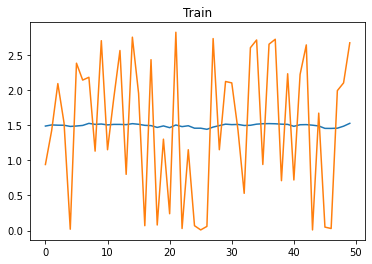

2/2 [==============================] - 0s 4ms/step


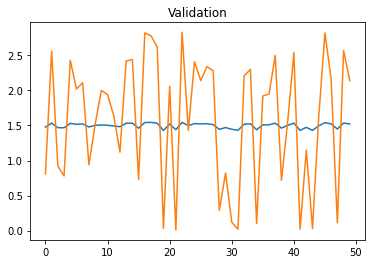

3/3 [==============================] - 0s 3ms/step


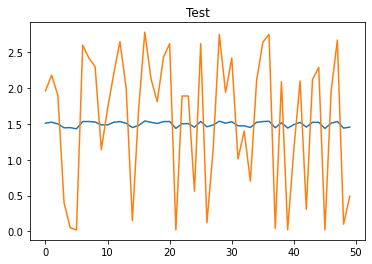

3/3 [==============================] - 0s 3ms/step


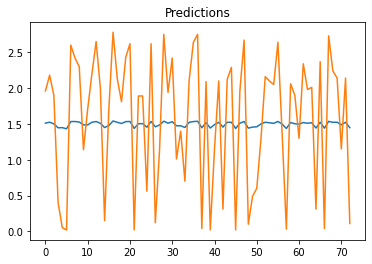

In [59]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_lstm_mse = plot_predictions1(model,x_test, y_test)

Epoch 1/30
1/8 [==>...........................] - ETA: 3s - loss: 4.2078 - root_mean_squared_error: 2.0513INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 2s 242ms/step - loss: 3.3634 - root_mean_squared_error: 1.8340 - val_loss: 2.1197 - val_root_mean_squared_error: 1.4559
Epoch 2/30
1/8 [==>...........................] - ETA: 0s - loss: 2.5731 - root_mean_squared_error: 1.6041INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 1s 145ms/step - loss: 2.2515 - root_mean_squared_error: 1.5005 - val_loss: 1.2555 - val_root_mean_squared_error: 1.1205
Epoch 3/30
1/8 [==>...........................] - ETA: 0s - loss: 1.6989 - root_mean_squared_error: 1.3034INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 1s 142ms/step - loss: 1.4747 - root_mean_squared_error: 1.2144 - val_loss: 0.7026 - val_root_mean_squared_error: 0.8382
Epoch 4/30
1/8 [==>...........................] - ETA: 0s - loss: 0.9016 - root_mean_squared_error: 0.9495INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 1s 143ms/step - loss: 0.9871 - root_mean_squared_error: 0.9935 - val_loss: 0.4086 - val_root_mean_squared_error: 0.6392
Epoch 5/30
1/8 [==>...........................] - ETA: 0s - loss: 0.9939 - root_mean_squared_error: 0.9969INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 1s 142ms/step - loss: 0.7420 - root_mean_squared_error: 0.8614 - val_loss: 0.2810 - val_root_mean_squared_error: 0.5301
Epoch 6/30
1/8 [==>...........................] - ETA: 0s - loss: 0.7193 - root_mean_squared_error: 0.8481INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 1s 194ms/step - loss: 0.6482 - root_mean_squared_error: 0.8051 - val_loss: 0.2476 - val_root_mean_squared_error: 0.4976
Epoch 7/30
8/8 [==============================] - 0s 9ms/step - loss: 0.6274 - root_mean_squared_error: 0.7921 - val_loss: 0.2487 - val_root_mean_squared_error: 0.4987
Epoch 8/30
1/8 [==>...........................] - ETA: 0s - loss: 0.7785 - root_mean_squared_error: 0.8823INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 1s 172ms/step - loss: 0.6292 - root_mean_squared_error: 0.7932 - val_loss: 0.2457 - val_root_mean_squared_error: 0.4957
Epoch 9/30
1/8 [==>...........................] - ETA: 0s - loss: 0.6616 - root_mean_squared_error: 0.8134INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 1s 163ms/step - loss: 0.6282 - root_mean_squared_error: 0.7926 - val_loss: 0.2370 - val_root_mean_squared_error: 0.4868
Epoch 10/30
1/8 [==>...........................] - ETA: 0s - loss: 0.5560 - root_mean_squared_error: 0.7456INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 1s 144ms/step - loss: 0.6252 - root_mean_squared_error: 0.7907 - val_loss: 0.2302 - val_root_mean_squared_error: 0.4798
Epoch 11/30
1/8 [==>...........................] - ETA: 0s - loss: 0.7673 - root_mean_squared_error: 0.8760INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 1s 154ms/step - loss: 0.6228 - root_mean_squared_error: 0.7892 - val_loss: 0.2239 - val_root_mean_squared_error: 0.4732
Epoch 12/30
1/8 [==>...........................] - ETA: 0s - loss: 0.5549 - root_mean_squared_error: 0.7449INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 1s 194ms/step - loss: 0.6205 - root_mean_squared_error: 0.7877 - val_loss: 0.2173 - val_root_mean_squared_error: 0.4661
Epoch 13/30
1/8 [==>...........................] - ETA: 0s - loss: 0.6570 - root_mean_squared_error: 0.8106INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 1s 153ms/step - loss: 0.6171 - root_mean_squared_error: 0.7856 - val_loss: 0.2097 - val_root_mean_squared_error: 0.4579
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 0.5960 - root_mean_squared_error: 0.7720INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 1s 147ms/step - loss: 0.6163 - root_mean_squared_error: 0.7851 - val_loss: 0.2045 - val_root_mean_squared_error: 0.4523
Epoch 15/30
1/8 [==>...........................] - ETA: 0s - loss: 0.6774 - root_mean_squared_error: 0.8230INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 1s 143ms/step - loss: 0.6150 - root_mean_squared_error: 0.7842 - val_loss: 0.1999 - val_root_mean_squared_error: 0.4471
Epoch 16/30
1/8 [==>...........................] - ETA: 0s - loss: 0.6116 - root_mean_squared_error: 0.7820INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 1s 142ms/step - loss: 0.6139 - root_mean_squared_error: 0.7835 - val_loss: 0.1962 - val_root_mean_squared_error: 0.4429
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 0.4105 - root_mean_squared_error: 0.6407INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 1s 142ms/step - loss: 0.6125 - root_mean_squared_error: 0.7826 - val_loss: 0.1926 - val_root_mean_squared_error: 0.4389
Epoch 18/30
1/8 [==>...........................] - ETA: 0s - loss: 0.7197 - root_mean_squared_error: 0.8483INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 1s 199ms/step - loss: 0.6104 - root_mean_squared_error: 0.7813 - val_loss: 0.1867 - val_root_mean_squared_error: 0.4321
Epoch 19/30
1/8 [==>...........................] - ETA: 0s - loss: 0.5731 - root_mean_squared_error: 0.7570INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 1s 148ms/step - loss: 0.6088 - root_mean_squared_error: 0.7803 - val_loss: 0.1830 - val_root_mean_squared_error: 0.4278
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 0.5861 - root_mean_squared_error: 0.7655INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 1s 154ms/step - loss: 0.6073 - root_mean_squared_error: 0.7793 - val_loss: 0.1800 - val_root_mean_squared_error: 0.4243
Epoch 21/30
1/8 [==>...........................] - ETA: 0s - loss: 0.6448 - root_mean_squared_error: 0.8030INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 1s 143ms/step - loss: 0.6059 - root_mean_squared_error: 0.7784 - val_loss: 0.1755 - val_root_mean_squared_error: 0.4189
Epoch 22/30
1/8 [==>...........................] - ETA: 0s - loss: 0.5554 - root_mean_squared_error: 0.7453INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 1s 142ms/step - loss: 0.6056 - root_mean_squared_error: 0.7782 - val_loss: 0.1722 - val_root_mean_squared_error: 0.4149
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 0.5591 - root_mean_squared_error: 0.7477INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 1s 197ms/step - loss: 0.6046 - root_mean_squared_error: 0.7775 - val_loss: 0.1657 - val_root_mean_squared_error: 0.4070
Epoch 24/30
1/8 [==>...........................] - ETA: 0s - loss: 0.5260 - root_mean_squared_error: 0.7252INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 1s 151ms/step - loss: 0.6013 - root_mean_squared_error: 0.7754 - val_loss: 0.1613 - val_root_mean_squared_error: 0.4017
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 0.5934 - root_mean_squared_error: 0.7703INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 1s 145ms/step - loss: 0.5999 - root_mean_squared_error: 0.7745 - val_loss: 0.1574 - val_root_mean_squared_error: 0.3968
Epoch 26/30
1/8 [==>...........................] - ETA: 0s - loss: 0.6330 - root_mean_squared_error: 0.7956INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 1s 144ms/step - loss: 0.5987 - root_mean_squared_error: 0.7737 - val_loss: 0.1528 - val_root_mean_squared_error: 0.3908
Epoch 27/30
1/8 [==>...........................] - ETA: 0s - loss: 0.6582 - root_mean_squared_error: 0.8113INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 1s 141ms/step - loss: 0.5977 - root_mean_squared_error: 0.7731 - val_loss: 0.1498 - val_root_mean_squared_error: 0.3871
Epoch 28/30
1/8 [==>...........................] - ETA: 0s - loss: 0.6893 - root_mean_squared_error: 0.8302INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 1s 196ms/step - loss: 0.5964 - root_mean_squared_error: 0.7723 - val_loss: 0.1461 - val_root_mean_squared_error: 0.3822
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 0.6651 - root_mean_squared_error: 0.8156INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 1s 159ms/step - loss: 0.5957 - root_mean_squared_error: 0.7718 - val_loss: 0.1444 - val_root_mean_squared_error: 0.3800
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 0.5325 - root_mean_squared_error: 0.7297INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 0s 2ms/step


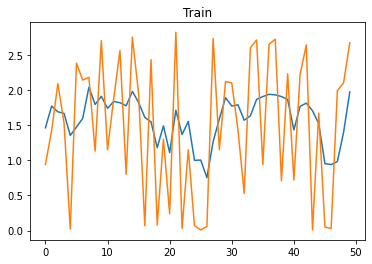

2/2 [==============================] - 0s 3ms/step


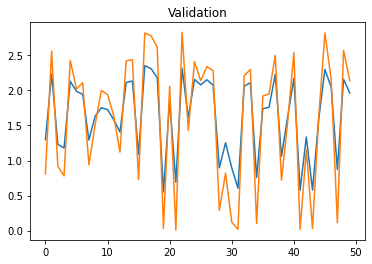

3/3 [==============================] - 0s 2ms/step


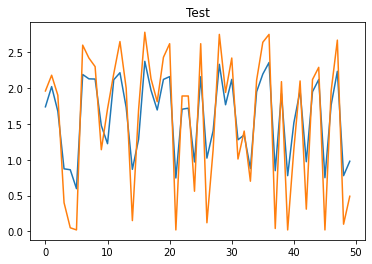

3/3 [==============================] - 0s 2ms/step


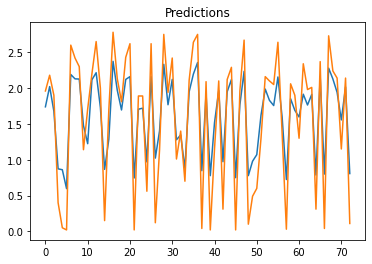

In [60]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(15, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_rnn_mse = plot_predictions1(model,x_test, y_test)

# AutoEncoder

### CNN

Epoch 1/30
1/8 [==>...........................] - ETA: 2s - loss: 56117.2500 - root_mean_squared_error: 236.8908

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 1s 113ms/step - loss: 37550.7773 - root_mean_squared_error: 193.7802 - val_loss: 4482.7041 - val_root_mean_squared_error: 66.9530
Epoch 2/30
1/8 [==>...........................] - ETA: 0s - loss: 16563.8379 - root_mean_squared_error: 128.7006

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 1s 155ms/step - loss: 15562.1064 - root_mean_squared_error: 124.7482 - val_loss: 3240.1885 - val_root_mean_squared_error: 56.9227
Epoch 3/30
8/8 [==============================] - 0s 10ms/step - loss: 18860.8887 - root_mean_squared_error: 137.3349 - val_loss: 3690.5132 - val_root_mean_squared_error: 60.7496
Epoch 4/30
1/8 [==>...........................] - ETA: 0s - loss: 17348.9414 - root_mean_squared_error: 131.7154

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 1s 107ms/step - loss: 14719.9619 - root_mean_squared_error: 121.3259 - val_loss: 444.3704 - val_root_mean_squared_error: 21.0801
Epoch 5/30
1/8 [==>...........................] - ETA: 0s - loss: 10487.4082 - root_mean_squared_error: 102.4081

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 1s 106ms/step - loss: 12410.4443 - root_mean_squared_error: 111.4022 - val_loss: 93.2900 - val_root_mean_squared_error: 9.6587
Epoch 6/30
1/8 [==>...........................] - ETA: 0s - loss: 7671.7285 - root_mean_squared_error: 87.5884

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 1s 137ms/step - loss: 9721.8584 - root_mean_squared_error: 98.5995 - val_loss: 70.6069 - val_root_mean_squared_error: 8.4028
Epoch 7/30
8/8 [==============================] - 0s 11ms/step - loss: 9637.5615 - root_mean_squared_error: 98.1711 - val_loss: 506.2837 - val_root_mean_squared_error: 22.5007
Epoch 8/30
8/8 [==============================] - 0s 12ms/step - loss: 6478.1948 - root_mean_squared_error: 80.4872 - val_loss: 1097.4077 - val_root_mean_squared_error: 33.1271
Epoch 9/30
8/8 [==============================] - 0s 15ms/step - loss: 7613.8198 - root_mean_squared_error: 87.2572 - val_loss: 1108.3672 - val_root_mean_squared_error: 33.2921
Epoch 10/30
8/8 [==============================] - 0s 10ms/step - loss: 5565.2993 - root_mean_squared_error: 74.6009 - val_loss: 1023.9980 - val_root_mean_squared_error: 32.0000
Epoch 11/30
8/8 [==============================] - 0s 9ms/step - loss: 4954.2817 - root_mean_squared_error: 70.3867 - val_loss: 

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 1s 102ms/step - loss: 2142.3430 - root_mean_squared_error: 46.2854 - val_loss: 34.0993 - val_root_mean_squared_error: 5.8395
Epoch 18/30
1/8 [==>...........................] - ETA: 0s - loss: 2223.8149 - root_mean_squared_error: 47.1573

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 1s 105ms/step - loss: 2278.5583 - root_mean_squared_error: 47.7342 - val_loss: 1.0191 - val_root_mean_squared_error: 1.0095
Epoch 19/30
8/8 [==============================] - 0s 9ms/step - loss: 1689.1173 - root_mean_squared_error: 41.0989 - val_loss: 3.3124 - val_root_mean_squared_error: 1.8200
Epoch 20/30
8/8 [==============================] - 0s 10ms/step - loss: 1546.6326 - root_mean_squared_error: 39.3273 - val_loss: 3.3126 - val_root_mean_squared_error: 1.8201
Epoch 21/30
8/8 [==============================] - 0s 10ms/step - loss: 1542.9102 - root_mean_squared_error: 39.2799 - val_loss: 3.3126 - val_root_mean_squared_error: 1.8201
Epoch 22/30
8/8 [==============================] - 0s 10ms/step - loss: 852.1050 - root_mean_squared_error: 29.1908 - val_loss: 3.3126 - val_root_mean_squared_error: 1.8201
Epoch 23/30
8/8 [==============================] - 0s 9ms/step - loss: 857.1398 - root_mean_squared_error: 29.2769 - val_loss: 3.3126 - val_roo

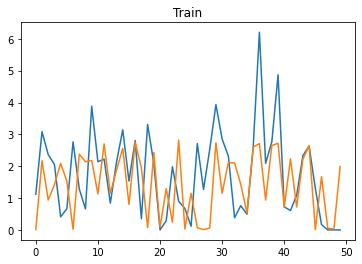

2/2 [==============================] - 0s 3ms/step


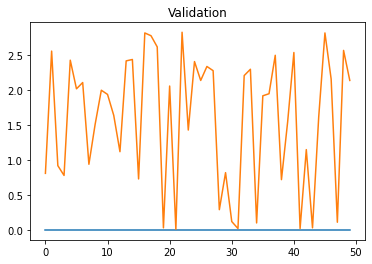

3/3 [==============================] - 0s 2ms/step


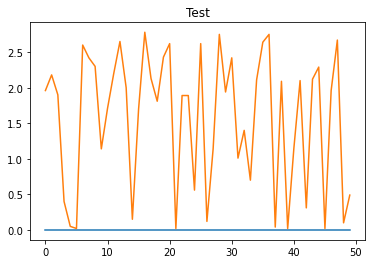

3/3 [==============================] - 0s 3ms/step


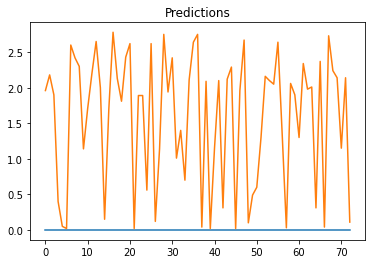

In [61]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [62]:
auto_cnn_mse

3.339420260908294

### GRU

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 5.4214 - root_mean_squared_error: 2.3284

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 4s 373ms/step - loss: 5.4214 - root_mean_squared_error: 2.3284 - val_loss: 4.2189 - val_root_mean_squared_error: 2.0540
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 4.5371 - root_mean_squared_error: 2.1301

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 3s 372ms/step - loss: 4.4770 - root_mean_squared_error: 2.1159 - val_loss: 3.3999 - val_root_mean_squared_error: 1.8439
Epoch 3/30
6/8 [=====================>........] - ETA: 0s - loss: 3.8680 - root_mean_squared_error: 1.9667

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 2s 353ms/step - loss: 3.6687 - root_mean_squared_error: 1.9154 - val_loss: 2.7196 - val_root_mean_squared_error: 1.6491
Epoch 4/30
7/8 [=========================>....] - ETA: 0s - loss: 3.0709 - root_mean_squared_error: 1.7524

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 3s 389ms/step - loss: 3.0821 - root_mean_squared_error: 1.7556 - val_loss: 2.1814 - val_root_mean_squared_error: 1.4770
Epoch 5/30
7/8 [=========================>....] - ETA: 0s - loss: 2.4382 - root_mean_squared_error: 1.5615

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 2s 337ms/step - loss: 2.4320 - root_mean_squared_error: 1.5595 - val_loss: 1.7505 - val_root_mean_squared_error: 1.3231
Epoch 6/30
6/8 [=====================>........] - ETA: 0s - loss: 1.9239 - root_mean_squared_error: 1.3870

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 2s 330ms/step - loss: 1.9085 - root_mean_squared_error: 1.3815 - val_loss: 1.4276 - val_root_mean_squared_error: 1.1948
Epoch 7/30
6/8 [=====================>........] - ETA: 0s - loss: 1.6576 - root_mean_squared_error: 1.2875

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 3s 408ms/step - loss: 1.6131 - root_mean_squared_error: 1.2701 - val_loss: 1.1885 - val_root_mean_squared_error: 1.0902
Epoch 8/30
6/8 [=====================>........] - ETA: 0s - loss: 1.3952 - root_mean_squared_error: 1.1812

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 2s 335ms/step - loss: 1.3921 - root_mean_squared_error: 1.1799 - val_loss: 1.0279 - val_root_mean_squared_error: 1.0139
Epoch 9/30
6/8 [=====================>........] - ETA: 0s - loss: 1.2869 - root_mean_squared_error: 1.1344

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 3s 387ms/step - loss: 1.2548 - root_mean_squared_error: 1.1202 - val_loss: 0.9197 - val_root_mean_squared_error: 0.9590
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 1.0617 - root_mean_squared_error: 1.0304

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 3s 380ms/step - loss: 1.0614 - root_mean_squared_error: 1.0302 - val_loss: 0.8486 - val_root_mean_squared_error: 0.9212
Epoch 11/30
6/8 [=====================>........] - ETA: 0s - loss: 0.9256 - root_mean_squared_error: 0.9621

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 2s 343ms/step - loss: 0.9669 - root_mean_squared_error: 0.9833 - val_loss: 0.8100 - val_root_mean_squared_error: 0.9000
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 0.9864 - root_mean_squared_error: 0.9932

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 3s 393ms/step - loss: 0.9864 - root_mean_squared_error: 0.9932 - val_loss: 0.7889 - val_root_mean_squared_error: 0.8882
Epoch 13/30
7/8 [=========================>....] - ETA: 0s - loss: 0.9120 - root_mean_squared_error: 0.9550

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 2s 334ms/step - loss: 0.9144 - root_mean_squared_error: 0.9562 - val_loss: 0.7792 - val_root_mean_squared_error: 0.8827
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 0.9314 - root_mean_squared_error: 0.9651

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 3s 379ms/step - loss: 0.8768 - root_mean_squared_error: 0.9364 - val_loss: 0.7758 - val_root_mean_squared_error: 0.8808
Epoch 15/30
1/8 [==>...........................] - ETA: 0s - loss: 0.9295 - root_mean_squared_error: 0.9641

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 2s 339ms/step - loss: 0.8854 - root_mean_squared_error: 0.9410 - val_loss: 0.7726 - val_root_mean_squared_error: 0.8790
Epoch 16/30
1/8 [==>...........................] - ETA: 0s - loss: 0.7675 - root_mean_squared_error: 0.8761

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 2s 323ms/step - loss: 0.8001 - root_mean_squared_error: 0.8945 - val_loss: 0.7684 - val_root_mean_squared_error: 0.8766
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 0.8507 - root_mean_squared_error: 0.9224

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 3s 384ms/step - loss: 0.8530 - root_mean_squared_error: 0.9236 - val_loss: 0.7619 - val_root_mean_squared_error: 0.8728
Epoch 18/30
1/8 [==>...........................] - ETA: 0s - loss: 0.8364 - root_mean_squared_error: 0.9146

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 2s 326ms/step - loss: 0.8500 - root_mean_squared_error: 0.9220 - val_loss: 0.7579 - val_root_mean_squared_error: 0.8706
Epoch 19/30
1/8 [==>...........................] - ETA: 0s - loss: 0.9642 - root_mean_squared_error: 0.9820

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 3s 384ms/step - loss: 0.8624 - root_mean_squared_error: 0.9287 - val_loss: 0.7545 - val_root_mean_squared_error: 0.8686
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 0.7016 - root_mean_squared_error: 0.8376

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 2s 326ms/step - loss: 0.8740 - root_mean_squared_error: 0.9349 - val_loss: 0.7458 - val_root_mean_squared_error: 0.8636
Epoch 21/30
1/8 [==>...........................] - ETA: 0s - loss: 0.7301 - root_mean_squared_error: 0.8545

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 3s 380ms/step - loss: 0.8491 - root_mean_squared_error: 0.9215 - val_loss: 0.7388 - val_root_mean_squared_error: 0.8595
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 0.7819 - root_mean_squared_error: 0.8843

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 3s 374ms/step - loss: 0.7819 - root_mean_squared_error: 0.8843 - val_loss: 0.7326 - val_root_mean_squared_error: 0.8559
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 0.6377 - root_mean_squared_error: 0.7985

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 2s 334ms/step - loss: 0.7668 - root_mean_squared_error: 0.8757 - val_loss: 0.7271 - val_root_mean_squared_error: 0.8527
Epoch 24/30
1/8 [==>...........................] - ETA: 0s - loss: 0.9015 - root_mean_squared_error: 0.9495

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 3s 385ms/step - loss: 0.8248 - root_mean_squared_error: 0.9082 - val_loss: 0.7200 - val_root_mean_squared_error: 0.8485
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 0.4602 - root_mean_squared_error: 0.6784

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 2s 325ms/step - loss: 0.7593 - root_mean_squared_error: 0.8714 - val_loss: 0.7138 - val_root_mean_squared_error: 0.8448
Epoch 26/30
1/8 [==>...........................] - ETA: 0s - loss: 0.6832 - root_mean_squared_error: 0.8265

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 3s 375ms/step - loss: 0.7518 - root_mean_squared_error: 0.8671 - val_loss: 0.7041 - val_root_mean_squared_error: 0.8391
Epoch 27/30
1/8 [==>...........................] - ETA: 0s - loss: 0.7100 - root_mean_squared_error: 0.8426

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 2s 337ms/step - loss: 0.7535 - root_mean_squared_error: 0.8680 - val_loss: 0.6980 - val_root_mean_squared_error: 0.8355
Epoch 28/30
1/8 [==>...........................] - ETA: 0s - loss: 0.8060 - root_mean_squared_error: 0.8978

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 3s 375ms/step - loss: 0.8247 - root_mean_squared_error: 0.9081 - val_loss: 0.6926 - val_root_mean_squared_error: 0.8322
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 0.8548 - root_mean_squared_error: 0.9246

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 2s 328ms/step - loss: 0.7570 - root_mean_squared_error: 0.8700 - val_loss: 0.6844 - val_root_mean_squared_error: 0.8273
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 0.9251 - root_mean_squared_error: 0.9618

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 0s 3ms/step


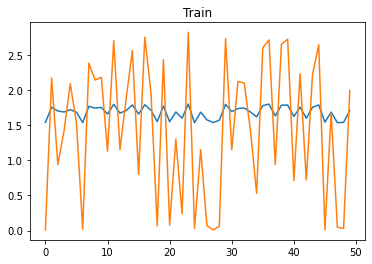

2/2 [==============================] - 0s 4ms/step


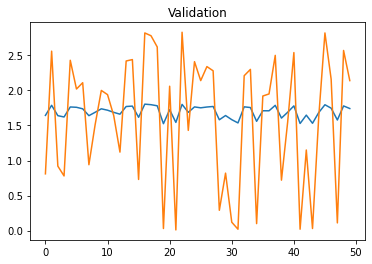

3/3 [==============================] - 0s 3ms/step


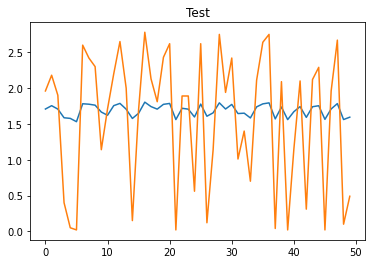

3/3 [==============================] - 0s 3ms/step


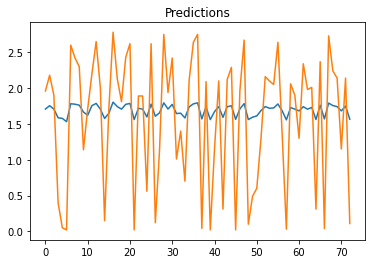

In [63]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_gru/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [64]:
auto_gru_mse

0.7120838806987438

### LSTM

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 4.8007 - root_mean_squared_error: 2.1910

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 5s 484ms/step - loss: 4.8007 - root_mean_squared_error: 2.1910 - val_loss: 3.7001 - val_root_mean_squared_error: 1.9236
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 4.6411 - root_mean_squared_error: 2.1543

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 3s 428ms/step - loss: 4.5480 - root_mean_squared_error: 2.1326 - val_loss: 3.5878 - val_root_mean_squared_error: 1.8941
Epoch 3/30
7/8 [=========================>....] - ETA: 0s - loss: 4.4405 - root_mean_squared_error: 2.1073

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 3s 455ms/step - loss: 4.4337 - root_mean_squared_error: 2.1056 - val_loss: 3.4732 - val_root_mean_squared_error: 1.8636
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 4.2298 - root_mean_squared_error: 2.0566

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 3s 383ms/step - loss: 4.2298 - root_mean_squared_error: 2.0566 - val_loss: 3.3599 - val_root_mean_squared_error: 1.8330
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 4.0326 - root_mean_squared_error: 2.0081

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 3s 447ms/step - loss: 4.0326 - root_mean_squared_error: 2.0081 - val_loss: 3.2471 - val_root_mean_squared_error: 1.8020
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 4.0394 - root_mean_squared_error: 2.0098

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 3s 399ms/step - loss: 3.9893 - root_mean_squared_error: 1.9973 - val_loss: 3.2337 - val_root_mean_squared_error: 1.7982
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 3.8850 - root_mean_squared_error: 1.9710

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 3s 375ms/step - loss: 3.8772 - root_mean_squared_error: 1.9691 - val_loss: 3.2231 - val_root_mean_squared_error: 1.7953
Epoch 8/30
7/8 [=========================>....] - ETA: 0s - loss: 3.8587 - root_mean_squared_error: 1.9644

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 3s 456ms/step - loss: 3.8260 - root_mean_squared_error: 1.9560 - val_loss: 3.2123 - val_root_mean_squared_error: 1.7923
Epoch 9/30
7/8 [=========================>....] - ETA: 0s - loss: 3.7912 - root_mean_squared_error: 1.9471

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 3s 380ms/step - loss: 3.7885 - root_mean_squared_error: 1.9464 - val_loss: 3.2018 - val_root_mean_squared_error: 1.7894
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 3.6619 - root_mean_squared_error: 1.9136

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 3s 451ms/step - loss: 3.7160 - root_mean_squared_error: 1.9277 - val_loss: 3.1909 - val_root_mean_squared_error: 1.7863
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 3.6990 - root_mean_squared_error: 1.9233

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 3s 379ms/step - loss: 3.6990 - root_mean_squared_error: 1.9233 - val_loss: 3.1795 - val_root_mean_squared_error: 1.7831
Epoch 12/30
7/8 [=========================>....] - ETA: 0s - loss: 3.6720 - root_mean_squared_error: 1.9162

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 3s 485ms/step - loss: 3.7016 - root_mean_squared_error: 1.9240 - val_loss: 3.1678 - val_root_mean_squared_error: 1.7798
Epoch 13/30
7/8 [=========================>....] - ETA: 0s - loss: 3.6833 - root_mean_squared_error: 1.9192

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 3s 390ms/step - loss: 3.6471 - root_mean_squared_error: 1.9097 - val_loss: 3.1553 - val_root_mean_squared_error: 1.7763
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 3.3846 - root_mean_squared_error: 1.8397

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 3s 434ms/step - loss: 3.6577 - root_mean_squared_error: 1.9125 - val_loss: 3.1422 - val_root_mean_squared_error: 1.7726
Epoch 15/30
1/8 [==>...........................] - ETA: 0s - loss: 4.1385 - root_mean_squared_error: 2.0343

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 3s 372ms/step - loss: 3.5871 - root_mean_squared_error: 1.8940 - val_loss: 3.1280 - val_root_mean_squared_error: 1.7686
Epoch 16/30
1/8 [==>...........................] - ETA: 0s - loss: 3.6468 - root_mean_squared_error: 1.9096

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 3s 455ms/step - loss: 3.5736 - root_mean_squared_error: 1.8904 - val_loss: 3.1132 - val_root_mean_squared_error: 1.7644
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 3.7052 - root_mean_squared_error: 1.9249

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 3s 374ms/step - loss: 3.5538 - root_mean_squared_error: 1.8852 - val_loss: 3.0976 - val_root_mean_squared_error: 1.7600
Epoch 18/30
1/8 [==>...........................] - ETA: 0s - loss: 3.0782 - root_mean_squared_error: 1.7545

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 3s 443ms/step - loss: 3.5205 - root_mean_squared_error: 1.8763 - val_loss: 3.0814 - val_root_mean_squared_error: 1.7554
Epoch 19/30
1/8 [==>...........................] - ETA: 0s - loss: 3.2954 - root_mean_squared_error: 1.8153

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 3s 372ms/step - loss: 3.4783 - root_mean_squared_error: 1.8650 - val_loss: 3.0636 - val_root_mean_squared_error: 1.7503
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 3.4794 - root_mean_squared_error: 1.8653

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 3s 450ms/step - loss: 3.4571 - root_mean_squared_error: 1.8593 - val_loss: 3.0264 - val_root_mean_squared_error: 1.7397
Epoch 21/30
1/8 [==>...........................] - ETA: 0s - loss: 2.8922 - root_mean_squared_error: 1.7006

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 3s 372ms/step - loss: 3.4008 - root_mean_squared_error: 1.8441 - val_loss: 2.9801 - val_root_mean_squared_error: 1.7263
Epoch 22/30
1/8 [==>...........................] - ETA: 0s - loss: 3.4107 - root_mean_squared_error: 1.8468

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 4s 574ms/step - loss: 3.3390 - root_mean_squared_error: 1.8273 - val_loss: 2.9301 - val_root_mean_squared_error: 1.7117
Epoch 23/30
6/8 [=====================>........] - ETA: 0s - loss: 3.3619 - root_mean_squared_error: 1.8336

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 3s 400ms/step - loss: 3.2996 - root_mean_squared_error: 1.8165 - val_loss: 2.8729 - val_root_mean_squared_error: 1.6950
Epoch 24/30
1/8 [==>...........................] - ETA: 0s - loss: 3.3372 - root_mean_squared_error: 1.8268

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 3s 439ms/step - loss: 3.2440 - root_mean_squared_error: 1.8011 - val_loss: 2.8179 - val_root_mean_squared_error: 1.6787
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 3.3077 - root_mean_squared_error: 1.8187

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 3s 372ms/step - loss: 3.1614 - root_mean_squared_error: 1.7780 - val_loss: 2.7622 - val_root_mean_squared_error: 1.6620
Epoch 26/30
1/8 [==>...........................] - ETA: 0s - loss: 3.1796 - root_mean_squared_error: 1.7831

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 3s 444ms/step - loss: 3.1009 - root_mean_squared_error: 1.7609 - val_loss: 2.6976 - val_root_mean_squared_error: 1.6424
Epoch 27/30
1/8 [==>...........................] - ETA: 0s - loss: 3.0124 - root_mean_squared_error: 1.7356

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 3s 374ms/step - loss: 2.9580 - root_mean_squared_error: 1.7199 - val_loss: 2.6296 - val_root_mean_squared_error: 1.6216
Epoch 28/30
1/8 [==>...........................] - ETA: 0s - loss: 2.6362 - root_mean_squared_error: 1.6236

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 3s 437ms/step - loss: 2.8467 - root_mean_squared_error: 1.6872 - val_loss: 2.4514 - val_root_mean_squared_error: 1.5657
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 2.4901 - root_mean_squared_error: 1.5780

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 3s 380ms/step - loss: 2.6133 - root_mean_squared_error: 1.6166 - val_loss: 2.1384 - val_root_mean_squared_error: 1.4623
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 2.7884 - root_mean_squared_error: 1.6699

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 0s 3ms/step


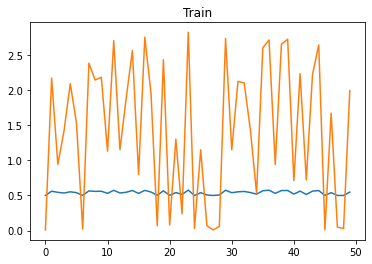

2/2 [==============================] - 0s 4ms/step


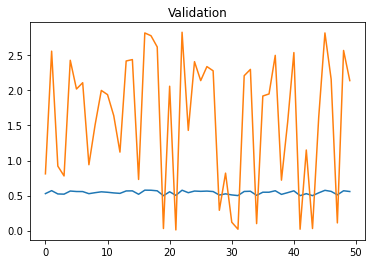

3/3 [==============================] - 0s 3ms/step


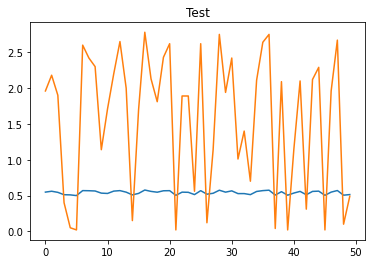

3/3 [==============================] - 0s 3ms/step


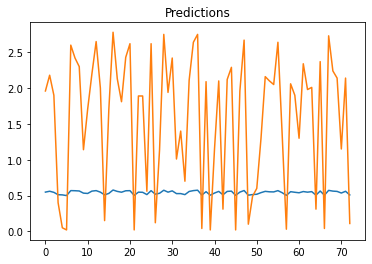

In [65]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
model.add(Dense(8, 'relu'))
model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [66]:
auto_lstm_mse

1.8771264120915858

### RNN

Epoch 1/30
1/8 [==>...........................] - ETA: 3s - loss: 3.6632 - root_mean_squared_error: 1.9139INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 2s 249ms/step - loss: 2.9342 - root_mean_squared_error: 1.7130 - val_loss: 1.6595 - val_root_mean_squared_error: 1.2882
Epoch 2/30
1/8 [==>...........................] - ETA: 0s - loss: 2.7413 - root_mean_squared_error: 1.6557INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 1s 201ms/step - loss: 2.2020 - root_mean_squared_error: 1.4839 - val_loss: 1.0769 - val_root_mean_squared_error: 1.0377
Epoch 3/30
1/8 [==>...........................] - ETA: 0s - loss: 1.5568 - root_mean_squared_error: 1.2477INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 1s 155ms/step - loss: 1.5931 - root_mean_squared_error: 1.2622 - val_loss: 0.7147 - val_root_mean_squared_error: 0.8454
Epoch 4/30
1/8 [==>...........................] - ETA: 0s - loss: 1.1090 - root_mean_squared_error: 1.0531INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 1s 163ms/step - loss: 1.1680 - root_mean_squared_error: 1.0807 - val_loss: 0.5238 - val_root_mean_squared_error: 0.7237
Epoch 5/30
1/8 [==>...........................] - ETA: 0s - loss: 1.1341 - root_mean_squared_error: 1.0650INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 1s 154ms/step - loss: 1.2090 - root_mean_squared_error: 1.0995 - val_loss: 0.4407 - val_root_mean_squared_error: 0.6639
Epoch 6/30
1/8 [==>...........................] - ETA: 0s - loss: 0.7862 - root_mean_squared_error: 0.8867INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 1s 207ms/step - loss: 0.7829 - root_mean_squared_error: 0.8848 - val_loss: 0.4183 - val_root_mean_squared_error: 0.6467
Epoch 7/30
1/8 [==>...........................] - ETA: 0s - loss: 0.8398 - root_mean_squared_error: 0.9164INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 1s 162ms/step - loss: 1.0219 - root_mean_squared_error: 1.0109 - val_loss: 0.4132 - val_root_mean_squared_error: 0.6428
Epoch 8/30
8/8 [==============================] - 0s 9ms/step - loss: 0.8341 - root_mean_squared_error: 0.9133 - val_loss: 0.4142 - val_root_mean_squared_error: 0.6436
Epoch 9/30
1/8 [==>...........................] - ETA: 0s - loss: 0.7339 - root_mean_squared_error: 0.8567INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 1s 153ms/step - loss: 0.9011 - root_mean_squared_error: 0.9493 - val_loss: 0.4020 - val_root_mean_squared_error: 0.6341
Epoch 10/30
1/8 [==>...........................] - ETA: 0s - loss: 1.3753 - root_mean_squared_error: 1.1728INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 1s 152ms/step - loss: 1.1182 - root_mean_squared_error: 1.0575 - val_loss: 0.3875 - val_root_mean_squared_error: 0.6225
Epoch 11/30
1/8 [==>...........................] - ETA: 0s - loss: 0.8374 - root_mean_squared_error: 0.9151INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 1s 151ms/step - loss: 0.9402 - root_mean_squared_error: 0.9696 - val_loss: 0.3755 - val_root_mean_squared_error: 0.6128
Epoch 12/30
1/8 [==>...........................] - ETA: 0s - loss: 0.9335 - root_mean_squared_error: 0.9662INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 1s 206ms/step - loss: 0.9043 - root_mean_squared_error: 0.9509 - val_loss: 0.3581 - val_root_mean_squared_error: 0.5984
Epoch 13/30
1/8 [==>...........................] - ETA: 0s - loss: 0.9522 - root_mean_squared_error: 0.9758INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 1s 168ms/step - loss: 0.8556 - root_mean_squared_error: 0.9250 - val_loss: 0.3430 - val_root_mean_squared_error: 0.5856
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 0.8581 - root_mean_squared_error: 0.9264INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 1s 161ms/step - loss: 0.8876 - root_mean_squared_error: 0.9422 - val_loss: 0.3323 - val_root_mean_squared_error: 0.5764
Epoch 15/30
1/8 [==>...........................] - ETA: 0s - loss: 0.5870 - root_mean_squared_error: 0.7661INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 1s 153ms/step - loss: 0.7452 - root_mean_squared_error: 0.8632 - val_loss: 0.3261 - val_root_mean_squared_error: 0.5710
Epoch 16/30
1/8 [==>...........................] - ETA: 0s - loss: 0.6445 - root_mean_squared_error: 0.8028INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 1s 152ms/step - loss: 0.8267 - root_mean_squared_error: 0.9092 - val_loss: 0.3244 - val_root_mean_squared_error: 0.5695
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 0.9781 - root_mean_squared_error: 0.9890INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 1s 208ms/step - loss: 0.8272 - root_mean_squared_error: 0.9095 - val_loss: 0.3189 - val_root_mean_squared_error: 0.5647
Epoch 18/30
1/8 [==>...........................] - ETA: 0s - loss: 0.6544 - root_mean_squared_error: 0.8090INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 1s 161ms/step - loss: 0.7099 - root_mean_squared_error: 0.8425 - val_loss: 0.3084 - val_root_mean_squared_error: 0.5554
Epoch 19/30
1/8 [==>...........................] - ETA: 0s - loss: 0.6095 - root_mean_squared_error: 0.7807INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 1s 153ms/step - loss: 0.7704 - root_mean_squared_error: 0.8777 - val_loss: 0.2878 - val_root_mean_squared_error: 0.5364
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 0.8615 - root_mean_squared_error: 0.9281INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 1s 154ms/step - loss: 0.7600 - root_mean_squared_error: 0.8718 - val_loss: 0.2699 - val_root_mean_squared_error: 0.5195
Epoch 21/30
1/8 [==>...........................] - ETA: 0s - loss: 0.8234 - root_mean_squared_error: 0.9074INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 1s 151ms/step - loss: 0.7771 - root_mean_squared_error: 0.8816 - val_loss: 0.2583 - val_root_mean_squared_error: 0.5083
Epoch 22/30
1/8 [==>...........................] - ETA: 0s - loss: 0.6967 - root_mean_squared_error: 0.8347INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 2s 218ms/step - loss: 0.7615 - root_mean_squared_error: 0.8726 - val_loss: 0.2501 - val_root_mean_squared_error: 0.5001
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 0.4684 - root_mean_squared_error: 0.6844INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 1s 164ms/step - loss: 0.6778 - root_mean_squared_error: 0.8233 - val_loss: 0.2450 - val_root_mean_squared_error: 0.4950
Epoch 24/30
1/8 [==>...........................] - ETA: 0s - loss: 0.7504 - root_mean_squared_error: 0.8663INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 1s 154ms/step - loss: 0.6643 - root_mean_squared_error: 0.8151 - val_loss: 0.2331 - val_root_mean_squared_error: 0.4828
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 0.5184 - root_mean_squared_error: 0.7200INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 1s 154ms/step - loss: 0.6487 - root_mean_squared_error: 0.8054 - val_loss: 0.2233 - val_root_mean_squared_error: 0.4726
Epoch 26/30
1/8 [==>...........................] - ETA: 0s - loss: 0.7482 - root_mean_squared_error: 0.8650INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 1s 151ms/step - loss: 0.7927 - root_mean_squared_error: 0.8903 - val_loss: 0.2196 - val_root_mean_squared_error: 0.4686
Epoch 27/30
1/8 [==>...........................] - ETA: 0s - loss: 0.7666 - root_mean_squared_error: 0.8755INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 1s 205ms/step - loss: 0.7063 - root_mean_squared_error: 0.8404 - val_loss: 0.2065 - val_root_mean_squared_error: 0.4544
Epoch 28/30
1/8 [==>...........................] - ETA: 0s - loss: 0.5210 - root_mean_squared_error: 0.7218INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 1s 198ms/step - loss: 0.5448 - root_mean_squared_error: 0.7381 - val_loss: 0.1940 - val_root_mean_squared_error: 0.4405
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 0.7249 - root_mean_squared_error: 0.8514INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 1s 153ms/step - loss: 0.5644 - root_mean_squared_error: 0.7512 - val_loss: 0.1853 - val_root_mean_squared_error: 0.4304
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 0.6527 - root_mean_squared_error: 0.8079INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 0s 2ms/step


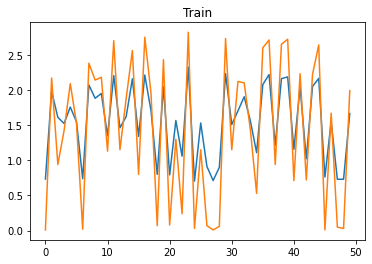

2/2 [==============================] - 0s 3ms/step


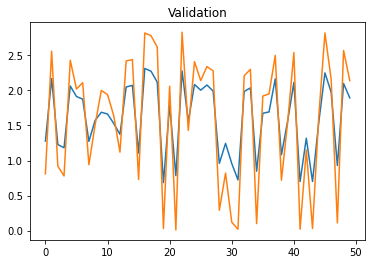

3/3 [==============================] - 0s 2ms/step


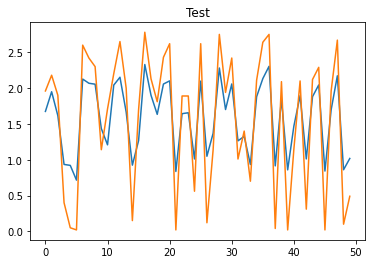

3/3 [==============================] - 0s 2ms/step


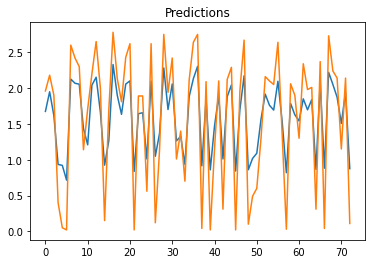

In [67]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [68]:
auto_rnn_mse

0.2197000253792267

# Moving Average with Encoder

### CNN

Epoch 1/30
1/8 [==>...........................] - ETA: 2s - loss: 64285.3125 - root_mean_squared_error: 253.5455

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 2s 174ms/step - loss: 52385.2695 - root_mean_squared_error: 228.8783 - val_loss: 20773.5293 - val_root_mean_squared_error: 144.1302
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 36361.0195 - root_mean_squared_error: 190.6857

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 1s 114ms/step - loss: 36456.0156 - root_mean_squared_error: 190.9346 - val_loss: 14588.8340 - val_root_mean_squared_error: 120.7842
Epoch 3/30
1/8 [==>...........................] - ETA: 0s - loss: 22950.1367 - root_mean_squared_error: 151.4930

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 1s 101ms/step - loss: 30856.3496 - root_mean_squared_error: 175.6598 - val_loss: 6155.2090 - val_root_mean_squared_error: 78.4551
Epoch 4/30
1/8 [==>...........................] - ETA: 0s - loss: 36158.2734 - root_mean_squared_error: 190.1533

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 1s 100ms/step - loss: 37939.1133 - root_mean_squared_error: 194.7796 - val_loss: 1565.4351 - val_root_mean_squared_error: 39.5656
Epoch 5/30
1/8 [==>...........................] - ETA: 0s - loss: 22902.8086 - root_mean_squared_error: 151.3367

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 1s 100ms/step - loss: 27307.4258 - root_mean_squared_error: 165.2496 - val_loss: 1015.2776 - val_root_mean_squared_error: 31.8634
Epoch 6/30
1/8 [==>...........................] - ETA: 0s - loss: 32356.5742 - root_mean_squared_error: 179.8793

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 1s 100ms/step - loss: 29144.4102 - root_mean_squared_error: 170.7173 - val_loss: 322.7192 - val_root_mean_squared_error: 17.9644
Epoch 7/30
1/8 [==>...........................] - ETA: 0s - loss: 19327.7891 - root_mean_squared_error: 139.0244

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 1s 142ms/step - loss: 21706.7051 - root_mean_squared_error: 147.3320 - val_loss: 39.2537 - val_root_mean_squared_error: 6.2653
Epoch 8/30
8/8 [==============================] - 0s 10ms/step - loss: 16697.1133 - root_mean_squared_error: 129.2173 - val_loss: 99.0688 - val_root_mean_squared_error: 9.9533
Epoch 9/30
8/8 [==============================] - 0s 9ms/step - loss: 16665.0762 - root_mean_squared_error: 129.0933 - val_loss: 488.0350 - val_root_mean_squared_error: 22.0915
Epoch 10/30
8/8 [==============================] - 0s 9ms/step - loss: 14365.9170 - root_mean_squared_error: 119.8579 - val_loss: 577.4800 - val_root_mean_squared_error: 24.0308
Epoch 11/30
8/8 [==============================] - 0s 9ms/step - loss: 13916.2002 - root_mean_squared_error: 117.9669 - val_loss: 924.9135 - val_root_mean_squared_error: 30.4124
Epoch 12/30
8/8 [==============================] - 0s 9ms/step - loss: 10007.6836 - root_mean_squared_error: 100.0384 - val_l

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 1s 107ms/step - loss: 3663.4917 - root_mean_squared_error: 60.5268 - val_loss: 32.5701 - val_root_mean_squared_error: 5.7070
Epoch 19/30
1/8 [==>...........................] - ETA: 0s - loss: 1476.5111 - root_mean_squared_error: 38.4254

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 1s 109ms/step - loss: 2403.4163 - root_mean_squared_error: 49.0247 - val_loss: 6.5462 - val_root_mean_squared_error: 2.5585
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 5081.3154 - root_mean_squared_error: 71.2833

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 1s 106ms/step - loss: 2589.5696 - root_mean_squared_error: 50.8878 - val_loss: 3.2963 - val_root_mean_squared_error: 1.8156
Epoch 21/30
1/8 [==>...........................] - ETA: 0s - loss: 1936.8347 - root_mean_squared_error: 44.0095

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 1s 102ms/step - loss: 2311.7771 - root_mean_squared_error: 48.0809 - val_loss: 3.2951 - val_root_mean_squared_error: 1.8152
Epoch 22/30
1/8 [==>...........................] - ETA: 0s - loss: 2506.3396 - root_mean_squared_error: 50.0634

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 1s 100ms/step - loss: 1753.2416 - root_mean_squared_error: 41.8717 - val_loss: 3.2940 - val_root_mean_squared_error: 1.8149
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 947.4442 - root_mean_squared_error: 30.7806

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 1s 100ms/step - loss: 2023.9498 - root_mean_squared_error: 44.9883 - val_loss: 3.2931 - val_root_mean_squared_error: 1.8147
Epoch 24/30
1/8 [==>...........................] - ETA: 0s - loss: 321.2607 - root_mean_squared_error: 17.9237

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 1s 141ms/step - loss: 1981.3618 - root_mean_squared_error: 44.5125 - val_loss: 3.2922 - val_root_mean_squared_error: 1.8144
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 1042.0176 - root_mean_squared_error: 32.2803

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 1s 101ms/step - loss: 1092.3615 - root_mean_squared_error: 33.0509 - val_loss: 3.2913 - val_root_mean_squared_error: 1.8142
Epoch 26/30
1/8 [==>...........................] - ETA: 0s - loss: 691.8284 - root_mean_squared_error: 26.3026

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 1s 98ms/step - loss: 1920.2478 - root_mean_squared_error: 43.8206 - val_loss: 3.2903 - val_root_mean_squared_error: 1.8139
Epoch 27/30
1/8 [==>...........................] - ETA: 0s - loss: 2868.7388 - root_mean_squared_error: 53.5606

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 1s 97ms/step - loss: 1155.4396 - root_mean_squared_error: 33.9918 - val_loss: 3.2894 - val_root_mean_squared_error: 1.8137
Epoch 28/30
1/8 [==>...........................] - ETA: 0s - loss: 582.4175 - root_mean_squared_error: 24.1333

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 1s 98ms/step - loss: 957.9713 - root_mean_squared_error: 30.9511 - val_loss: 3.2885 - val_root_mean_squared_error: 1.8134
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 432.6200 - root_mean_squared_error: 20.7995

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 1s 99ms/step - loss: 634.6141 - root_mean_squared_error: 25.1915 - val_loss: 3.2876 - val_root_mean_squared_error: 1.8132
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 92.7580 - root_mean_squared_error: 9.6311

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 0s 2ms/step


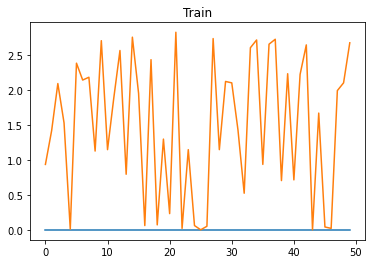

2/2 [==============================] - 0s 3ms/step


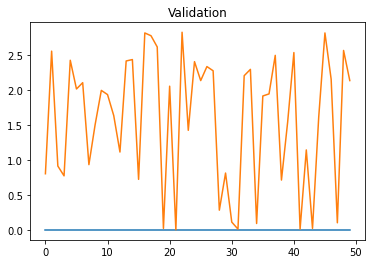

3/3 [==============================] - 0s 2ms/step


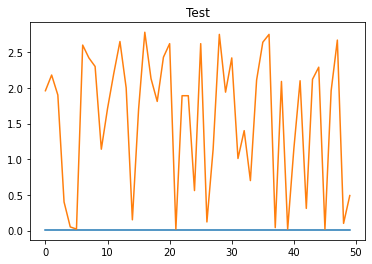

3/3 [==============================] - 0s 2ms/step


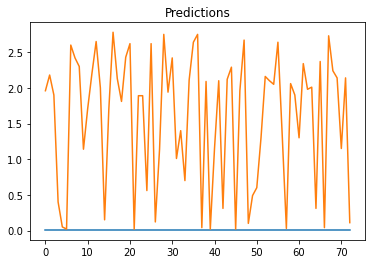

In [69]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_autoencoder_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [70]:
mavg_auto_cnn_mse

3.314162318598314

### RNN

Epoch 1/30
1/8 [==>...........................] - ETA: 4s - loss: 4.4580 - root_mean_squared_error: 2.1114INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 2s 178ms/step - loss: 3.9168 - root_mean_squared_error: 1.9791 - val_loss: 2.1937 - val_root_mean_squared_error: 1.4811
Epoch 2/30
1/8 [==>...........................] - ETA: 0s - loss: 3.1734 - root_mean_squared_error: 1.7814INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 1s 152ms/step - loss: 2.6731 - root_mean_squared_error: 1.6349 - val_loss: 1.2950 - val_root_mean_squared_error: 1.1380
Epoch 3/30
1/8 [==>...........................] - ETA: 0s - loss: 1.9666 - root_mean_squared_error: 1.4024INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 1s 151ms/step - loss: 1.7499 - root_mean_squared_error: 1.3228 - val_loss: 0.8414 - val_root_mean_squared_error: 0.9173
Epoch 4/30
1/8 [==>...........................] - ETA: 0s - loss: 1.5750 - root_mean_squared_error: 1.2550INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 1s 204ms/step - loss: 1.2529 - root_mean_squared_error: 1.1194 - val_loss: 0.6601 - val_root_mean_squared_error: 0.8125
Epoch 5/30
1/8 [==>...........................] - ETA: 0s - loss: 0.8747 - root_mean_squared_error: 0.9352INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 1s 152ms/step - loss: 1.0673 - root_mean_squared_error: 1.0331 - val_loss: 0.5913 - val_root_mean_squared_error: 0.7690
Epoch 6/30
1/8 [==>...........................] - ETA: 0s - loss: 1.1967 - root_mean_squared_error: 1.0939INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 1s 170ms/step - loss: 1.2132 - root_mean_squared_error: 1.1015 - val_loss: 0.5702 - val_root_mean_squared_error: 0.7551
Epoch 7/30
8/8 [==============================] - 0s 11ms/step - loss: 1.2911 - root_mean_squared_error: 1.1363 - val_loss: 0.5708 - val_root_mean_squared_error: 0.7555
Epoch 8/30
8/8 [==============================] - 0s 11ms/step - loss: 1.1483 - root_mean_squared_error: 1.0716 - val_loss: 0.5725 - val_root_mean_squared_error: 0.7567
Epoch 9/30
8/8 [==============================] - 0s 12ms/step - loss: 1.0866 - root_mean_squared_error: 1.0424 - val_loss: 0.5725 - val_root_mean_squared_error: 0.7566
Epoch 10/30
1/8 [==>...........................] - ETA: 0s - loss: 1.2330 - root_mean_squared_error: 1.1104INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 1s 159ms/step - loss: 1.2510 - root_mean_squared_error: 1.1185 - val_loss: 0.5670 - val_root_mean_squared_error: 0.7530
Epoch 11/30
1/8 [==>...........................] - ETA: 0s - loss: 1.4165 - root_mean_squared_error: 1.1902INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 1s 151ms/step - loss: 1.1464 - root_mean_squared_error: 1.0707 - val_loss: 0.5571 - val_root_mean_squared_error: 0.7464
Epoch 12/30
1/8 [==>...........................] - ETA: 0s - loss: 1.1152 - root_mean_squared_error: 1.0560INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 1s 211ms/step - loss: 1.0509 - root_mean_squared_error: 1.0252 - val_loss: 0.5433 - val_root_mean_squared_error: 0.7371
Epoch 13/30
1/8 [==>...........................] - ETA: 0s - loss: 1.4153 - root_mean_squared_error: 1.1897INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 1s 152ms/step - loss: 1.0175 - root_mean_squared_error: 1.0087 - val_loss: 0.5336 - val_root_mean_squared_error: 0.7305
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 0.9117 - root_mean_squared_error: 0.9548INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 1s 150ms/step - loss: 1.0800 - root_mean_squared_error: 1.0392 - val_loss: 0.5229 - val_root_mean_squared_error: 0.7231
Epoch 15/30
1/8 [==>...........................] - ETA: 0s - loss: 1.3974 - root_mean_squared_error: 1.1821INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 1s 150ms/step - loss: 1.0613 - root_mean_squared_error: 1.0302 - val_loss: 0.5191 - val_root_mean_squared_error: 0.7205
Epoch 16/30
8/8 [==============================] - 0s 8ms/step - loss: 1.0173 - root_mean_squared_error: 1.0086 - val_loss: 0.5197 - val_root_mean_squared_error: 0.7209
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 1.1624 - root_mean_squared_error: 1.0782INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 1s 206ms/step - loss: 1.1196 - root_mean_squared_error: 1.0581 - val_loss: 0.5115 - val_root_mean_squared_error: 0.7152
Epoch 18/30
1/8 [==>...........................] - ETA: 0s - loss: 0.8163 - root_mean_squared_error: 0.9035INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 1s 158ms/step - loss: 0.9407 - root_mean_squared_error: 0.9699 - val_loss: 0.5011 - val_root_mean_squared_error: 0.7079
Epoch 19/30
1/8 [==>...........................] - ETA: 0s - loss: 0.8325 - root_mean_squared_error: 0.9124INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 1s 153ms/step - loss: 0.9093 - root_mean_squared_error: 0.9536 - val_loss: 0.4907 - val_root_mean_squared_error: 0.7005
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 1.1177 - root_mean_squared_error: 1.0572INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 1s 152ms/step - loss: 0.9793 - root_mean_squared_error: 0.9896 - val_loss: 0.4820 - val_root_mean_squared_error: 0.6942
Epoch 21/30
1/8 [==>...........................] - ETA: 0s - loss: 0.8976 - root_mean_squared_error: 0.9474INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 1s 160ms/step - loss: 0.9785 - root_mean_squared_error: 0.9892 - val_loss: 0.4786 - val_root_mean_squared_error: 0.6918
Epoch 22/30
1/8 [==>...........................] - ETA: 0s - loss: 0.7469 - root_mean_squared_error: 0.8642INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 2s 216ms/step - loss: 0.9696 - root_mean_squared_error: 0.9847 - val_loss: 0.4755 - val_root_mean_squared_error: 0.6896
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 1.1993 - root_mean_squared_error: 1.0951INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 1s 156ms/step - loss: 1.0563 - root_mean_squared_error: 1.0278 - val_loss: 0.4663 - val_root_mean_squared_error: 0.6828
Epoch 24/30
1/8 [==>...........................] - ETA: 0s - loss: 1.1170 - root_mean_squared_error: 1.0569INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 1s 152ms/step - loss: 1.0369 - root_mean_squared_error: 1.0183 - val_loss: 0.4537 - val_root_mean_squared_error: 0.6735
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 1.0868 - root_mean_squared_error: 1.0425INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 1s 150ms/step - loss: 0.9781 - root_mean_squared_error: 0.9890 - val_loss: 0.4464 - val_root_mean_squared_error: 0.6681
Epoch 26/30
1/8 [==>...........................] - ETA: 0s - loss: 1.0932 - root_mean_squared_error: 1.0456INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 1s 152ms/step - loss: 0.9191 - root_mean_squared_error: 0.9587 - val_loss: 0.4385 - val_root_mean_squared_error: 0.6622
Epoch 27/30
1/8 [==>...........................] - ETA: 0s - loss: 0.5874 - root_mean_squared_error: 0.7664INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 1s 204ms/step - loss: 0.9663 - root_mean_squared_error: 0.9830 - val_loss: 0.4356 - val_root_mean_squared_error: 0.6600
Epoch 28/30
1/8 [==>...........................] - ETA: 0s - loss: 1.1398 - root_mean_squared_error: 1.0676INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 1s 156ms/step - loss: 0.9818 - root_mean_squared_error: 0.9909 - val_loss: 0.4228 - val_root_mean_squared_error: 0.6502
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 0.7168 - root_mean_squared_error: 0.8467INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 1s 154ms/step - loss: 0.9264 - root_mean_squared_error: 0.9625 - val_loss: 0.4094 - val_root_mean_squared_error: 0.6399
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 0.8284 - root_mean_squared_error: 0.9101INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 0s 2ms/step


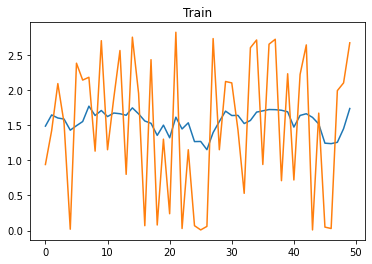

2/2 [==============================] - 0s 3ms/step


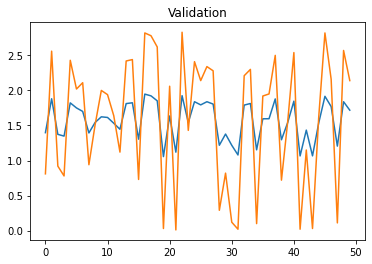

3/3 [==============================] - 0s 2ms/step


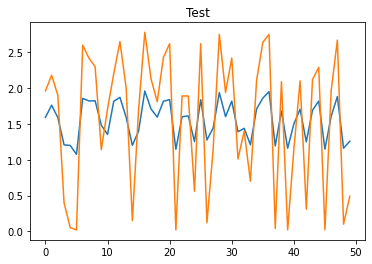

3/3 [==============================] - 0s 2ms/step


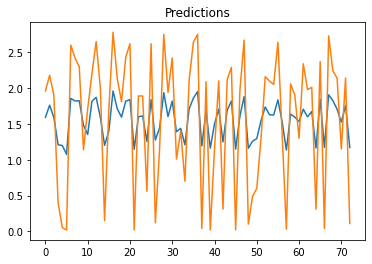

In [71]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs,moving_avg_data,target, x_val, y_val)


plot_train("mavg_auto_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [72]:
mavg_auto_rnn_mse

0.4470403538934934

### GRU

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 4.5696 - root_mean_squared_error: 2.1377

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 4s 373ms/step - loss: 4.5696 - root_mean_squared_error: 2.1377 - val_loss: 3.5431 - val_root_mean_squared_error: 1.8823
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 4.0321 - root_mean_squared_error: 2.0080

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 3s 427ms/step - loss: 4.0241 - root_mean_squared_error: 2.0060 - val_loss: 2.9068 - val_root_mean_squared_error: 1.7049
Epoch 3/30
6/8 [=====================>........] - ETA: 0s - loss: 3.5079 - root_mean_squared_error: 1.8729

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 2s 344ms/step - loss: 3.3506 - root_mean_squared_error: 1.8305 - val_loss: 2.3663 - val_root_mean_squared_error: 1.5383
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 2.6250 - root_mean_squared_error: 1.6202

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 2s 332ms/step - loss: 2.6250 - root_mean_squared_error: 1.6202 - val_loss: 1.9340 - val_root_mean_squared_error: 1.3907
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 2.2607 - root_mean_squared_error: 1.5036

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 3s 396ms/step - loss: 2.2607 - root_mean_squared_error: 1.5036 - val_loss: 1.5827 - val_root_mean_squared_error: 1.2581
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 1.8780 - root_mean_squared_error: 1.3704

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 2s 333ms/step - loss: 1.8835 - root_mean_squared_error: 1.3724 - val_loss: 1.3045 - val_root_mean_squared_error: 1.1421
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 1.4423 - root_mean_squared_error: 1.2010

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 3s 394ms/step - loss: 1.4423 - root_mean_squared_error: 1.2010 - val_loss: 1.1027 - val_root_mean_squared_error: 1.0501
Epoch 8/30
7/8 [=========================>....] - ETA: 0s - loss: 1.2951 - root_mean_squared_error: 1.1380

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 2s 339ms/step - loss: 1.2938 - root_mean_squared_error: 1.1374 - val_loss: 0.9584 - val_root_mean_squared_error: 0.9790
Epoch 9/30
7/8 [=========================>....] - ETA: 0s - loss: 1.0973 - root_mean_squared_error: 1.0475

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 3s 393ms/step - loss: 1.1089 - root_mean_squared_error: 1.0531 - val_loss: 0.8618 - val_root_mean_squared_error: 0.9283
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 1.0824 - root_mean_squared_error: 1.0404

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 2s 342ms/step - loss: 1.0824 - root_mean_squared_error: 1.0404 - val_loss: 0.7957 - val_root_mean_squared_error: 0.8920
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 0.9882 - root_mean_squared_error: 0.9941

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 2s 339ms/step - loss: 0.9882 - root_mean_squared_error: 0.9941 - val_loss: 0.7579 - val_root_mean_squared_error: 0.8706
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 0.9399 - root_mean_squared_error: 0.9695

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 3s 396ms/step - loss: 0.9399 - root_mean_squared_error: 0.9695 - val_loss: 0.7372 - val_root_mean_squared_error: 0.8586
Epoch 13/30
7/8 [=========================>....] - ETA: 0s - loss: 0.9016 - root_mean_squared_error: 0.9495

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 2s 346ms/step - loss: 0.9034 - root_mean_squared_error: 0.9505 - val_loss: 0.7278 - val_root_mean_squared_error: 0.8531
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 0.8840 - root_mean_squared_error: 0.9402

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 3s 421ms/step - loss: 0.8955 - root_mean_squared_error: 0.9463 - val_loss: 0.7234 - val_root_mean_squared_error: 0.8506
Epoch 15/30
8/8 [==============================] - 0s 10ms/step - loss: 0.8628 - root_mean_squared_error: 0.9289 - val_loss: 0.7235 - val_root_mean_squared_error: 0.8506
Epoch 16/30
8/8 [==============================] - 0s 10ms/step - loss: 0.8573 - root_mean_squared_error: 0.9259 - val_loss: 0.7279 - val_root_mean_squared_error: 0.8532
Epoch 17/30
8/8 [==============================] - 0s 10ms/step - loss: 0.8839 - root_mean_squared_error: 0.9401 - val_loss: 0.7307 - val_root_mean_squared_error: 0.8548
Epoch 18/30
8/8 [==============================] - 0s 10ms/step - loss: 0.8968 - root_mean_squared_error: 0.9470 - val_loss: 0.7294 - val_root_mean_squared_error: 0.8540
Epoch 19/30
8/8 [==============================] - 0s 10ms/step - loss: 0.8284 - root_mean_squared_error: 0.9102 - val_loss: 0.7293 - val_root_mean_squared_error

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 2s 330ms/step - loss: 0.8295 - root_mean_squared_error: 0.9108 - val_loss: 0.7227 - val_root_mean_squared_error: 0.8501
Epoch 26/30
1/8 [==>...........................] - ETA: 0s - loss: 0.6877 - root_mean_squared_error: 0.8293

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 2s 325ms/step - loss: 0.7971 - root_mean_squared_error: 0.8928 - val_loss: 0.7193 - val_root_mean_squared_error: 0.8481
Epoch 27/30
1/8 [==>...........................] - ETA: 0s - loss: 0.8956 - root_mean_squared_error: 0.9464

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 3s 393ms/step - loss: 0.9315 - root_mean_squared_error: 0.9651 - val_loss: 0.7168 - val_root_mean_squared_error: 0.8467
Epoch 28/30
1/8 [==>...........................] - ETA: 0s - loss: 0.9338 - root_mean_squared_error: 0.9664

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 2s 338ms/step - loss: 0.8801 - root_mean_squared_error: 0.9381 - val_loss: 0.7158 - val_root_mean_squared_error: 0.8460
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 0.7285 - root_mean_squared_error: 0.8535

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 3s 380ms/step - loss: 0.8319 - root_mean_squared_error: 0.9121 - val_loss: 0.7109 - val_root_mean_squared_error: 0.8432
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 0.6017 - root_mean_squared_error: 0.7757

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 0s 3ms/step


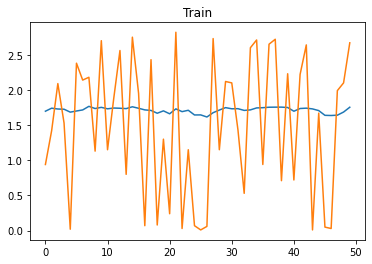

2/2 [==============================] - 0s 4ms/step


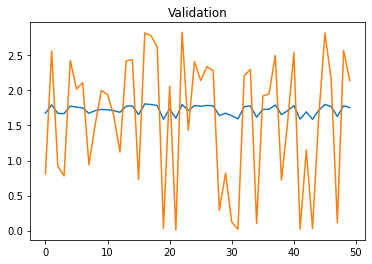

3/3 [==============================] - 0s 3ms/step


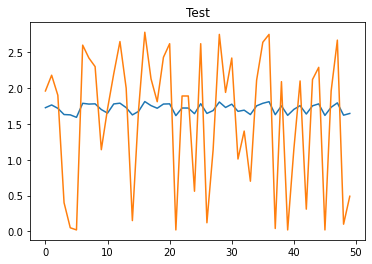

3/3 [==============================] - 0s 3ms/step


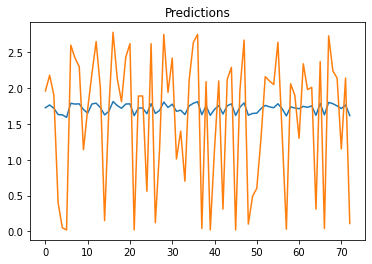

In [73]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_gru/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_auto_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [74]:
mavg_auto_gru_mse

0.746995434063369

### LSTM

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 3.5642 - root_mean_squared_error: 1.8879

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 4s 416ms/step - loss: 3.5642 - root_mean_squared_error: 1.8879 - val_loss: 2.8241 - val_root_mean_squared_error: 1.6805
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 3.1767 - root_mean_squared_error: 1.7823

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 3s 439ms/step - loss: 3.1767 - root_mean_squared_error: 1.7823 - val_loss: 2.4683 - val_root_mean_squared_error: 1.5711
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 2.8074 - root_mean_squared_error: 1.6755

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 3s 407ms/step - loss: 2.8074 - root_mean_squared_error: 1.6755 - val_loss: 2.1352 - val_root_mean_squared_error: 1.4612
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 2.5445 - root_mean_squared_error: 1.5951

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 3s 437ms/step - loss: 2.5445 - root_mean_squared_error: 1.5951 - val_loss: 1.8193 - val_root_mean_squared_error: 1.3488
Epoch 5/30
7/8 [=========================>....] - ETA: 0s - loss: 2.0762 - root_mean_squared_error: 1.4409

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 3s 367ms/step - loss: 2.0674 - root_mean_squared_error: 1.4378 - val_loss: 1.5894 - val_root_mean_squared_error: 1.2607
Epoch 6/30
1/8 [==>...........................] - ETA: 0s - loss: 1.6054 - root_mean_squared_error: 1.2670

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 3s 428ms/step - loss: 1.7834 - root_mean_squared_error: 1.3354 - val_loss: 1.4195 - val_root_mean_squared_error: 1.1914
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 1.7851 - root_mean_squared_error: 1.3361

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 3s 373ms/step - loss: 1.7851 - root_mean_squared_error: 1.3361 - val_loss: 1.2781 - val_root_mean_squared_error: 1.1306
Epoch 8/30
7/8 [=========================>....] - ETA: 0s - loss: 1.4328 - root_mean_squared_error: 1.1970

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 3s 368ms/step - loss: 1.4549 - root_mean_squared_error: 1.2062 - val_loss: 1.1630 - val_root_mean_squared_error: 1.0784
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 1.4248 - root_mean_squared_error: 1.1936

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 3s 435ms/step - loss: 1.4248 - root_mean_squared_error: 1.1936 - val_loss: 1.0722 - val_root_mean_squared_error: 1.0355
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 1.3326 - root_mean_squared_error: 1.1544

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 3s 361ms/step - loss: 1.3326 - root_mean_squared_error: 1.1544 - val_loss: 0.9996 - val_root_mean_squared_error: 0.9998
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 1.3340 - root_mean_squared_error: 1.1550

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 3s 436ms/step - loss: 1.3340 - root_mean_squared_error: 1.1550 - val_loss: 0.9383 - val_root_mean_squared_error: 0.9687
Epoch 12/30
7/8 [=========================>....] - ETA: 0s - loss: 1.1956 - root_mean_squared_error: 1.0935

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 3s 374ms/step - loss: 1.1820 - root_mean_squared_error: 1.0872 - val_loss: 0.8899 - val_root_mean_squared_error: 0.9434
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 1.0297 - root_mean_squared_error: 1.0148

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 3s 428ms/step - loss: 1.0297 - root_mean_squared_error: 1.0148 - val_loss: 0.8578 - val_root_mean_squared_error: 0.9262
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 0.8917 - root_mean_squared_error: 0.9443

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 3s 405ms/step - loss: 1.0108 - root_mean_squared_error: 1.0054 - val_loss: 0.8347 - val_root_mean_squared_error: 0.9136
Epoch 15/30
1/8 [==>...........................] - ETA: 0s - loss: 0.9853 - root_mean_squared_error: 0.9926

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 3s 437ms/step - loss: 0.9647 - root_mean_squared_error: 0.9822 - val_loss: 0.8182 - val_root_mean_squared_error: 0.9046
Epoch 16/30
1/8 [==>...........................] - ETA: 0s - loss: 0.7239 - root_mean_squared_error: 0.8508

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 3s 367ms/step - loss: 0.9166 - root_mean_squared_error: 0.9574 - val_loss: 0.8084 - val_root_mean_squared_error: 0.8991
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 0.9729 - root_mean_squared_error: 0.9864

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 2s 354ms/step - loss: 0.9928 - root_mean_squared_error: 0.9964 - val_loss: 0.8020 - val_root_mean_squared_error: 0.8956
Epoch 18/30
1/8 [==>...........................] - ETA: 0s - loss: 1.0050 - root_mean_squared_error: 1.0025

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 3s 451ms/step - loss: 0.9829 - root_mean_squared_error: 0.9914 - val_loss: 0.7969 - val_root_mean_squared_error: 0.8927
Epoch 19/30
6/8 [=====================>........] - ETA: 0s - loss: 0.8859 - root_mean_squared_error: 0.9412

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 3s 362ms/step - loss: 0.8480 - root_mean_squared_error: 0.9209 - val_loss: 0.7929 - val_root_mean_squared_error: 0.8905
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 0.7642 - root_mean_squared_error: 0.8742

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 3s 421ms/step - loss: 0.9250 - root_mean_squared_error: 0.9618 - val_loss: 0.7908 - val_root_mean_squared_error: 0.8893
Epoch 21/30
1/8 [==>...........................] - ETA: 0s - loss: 0.7608 - root_mean_squared_error: 0.8722

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 3s 357ms/step - loss: 0.9214 - root_mean_squared_error: 0.9599 - val_loss: 0.7887 - val_root_mean_squared_error: 0.8881
Epoch 22/30
1/8 [==>...........................] - ETA: 0s - loss: 0.6845 - root_mean_squared_error: 0.8273

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 3s 435ms/step - loss: 0.9387 - root_mean_squared_error: 0.9689 - val_loss: 0.7858 - val_root_mean_squared_error: 0.8865
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 1.1264 - root_mean_squared_error: 1.0613

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 3s 363ms/step - loss: 0.9550 - root_mean_squared_error: 0.9773 - val_loss: 0.7833 - val_root_mean_squared_error: 0.8850
Epoch 24/30
1/8 [==>...........................] - ETA: 0s - loss: 1.0219 - root_mean_squared_error: 1.0109

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 3s 456ms/step - loss: 0.8956 - root_mean_squared_error: 0.9464 - val_loss: 0.7817 - val_root_mean_squared_error: 0.8842
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 1.0403 - root_mean_squared_error: 1.0200

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 3s 374ms/step - loss: 0.8829 - root_mean_squared_error: 0.9396 - val_loss: 0.7791 - val_root_mean_squared_error: 0.8826
Epoch 26/30
1/8 [==>...........................] - ETA: 0s - loss: 1.0882 - root_mean_squared_error: 1.0432

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 3s 358ms/step - loss: 0.9359 - root_mean_squared_error: 0.9674 - val_loss: 0.7755 - val_root_mean_squared_error: 0.8806
Epoch 27/30
1/8 [==>...........................] - ETA: 0s - loss: 0.8746 - root_mean_squared_error: 0.9352

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 3s 433ms/step - loss: 0.9222 - root_mean_squared_error: 0.9603 - val_loss: 0.7723 - val_root_mean_squared_error: 0.8788
Epoch 28/30
1/8 [==>...........................] - ETA: 0s - loss: 0.6812 - root_mean_squared_error: 0.8253

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 3s 357ms/step - loss: 0.8632 - root_mean_squared_error: 0.9291 - val_loss: 0.7697 - val_root_mean_squared_error: 0.8773
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 1.0230 - root_mean_squared_error: 1.0114

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 3s 426ms/step - loss: 0.8880 - root_mean_squared_error: 0.9423 - val_loss: 0.7653 - val_root_mean_squared_error: 0.8748
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 0.7394 - root_mean_squared_error: 0.8599

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 0s 3ms/step


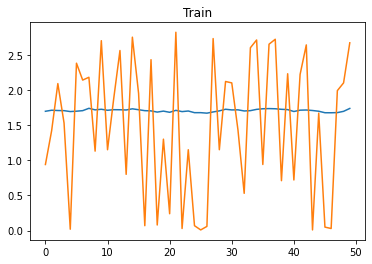

2/2 [==============================] - 0s 4ms/step


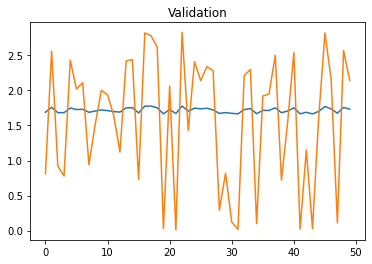

3/3 [==============================] - 0s 3ms/step


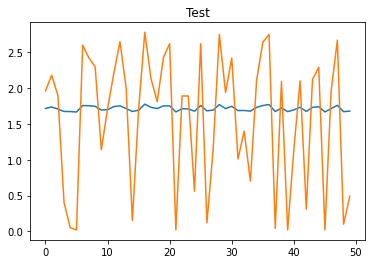

3/3 [==============================] - 0s 3ms/step


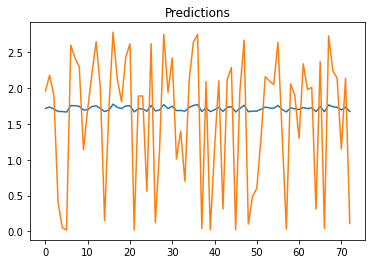

In [75]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
#model.add(Dense(8, 'relu'))
#model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs,moving_avg_data, target, x_val, y_val)


plot_train("mavg_auto_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [76]:
mavg_auto_lstm_mse

0.7983869732629865

# Hybrid

## General

### CNN LSTM

In [ ]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_cnn_lstm_mse

### RNN LSTM

In [ ]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(15,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_rnn_lstm_mse

### RNN GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(15, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [97]:
hybrid_rnn_gru_mse

0.6248134938453681

### CNN GRU 

In [ ]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))  
model.add(GRU(32)) 
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [100]:
hybrid_cnn_gru_mse

0.8651840207972483

### CNN RNN GRU

In [ ]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))  
model.add(GRU(32))  
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [111]:
hybrid_cnn_rnn_gru_mse

0.8702365121353666

### LSTM RNN GRU

In [112]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(15,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_lstm_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_lstm_rnn_gru_mse

## Moving Average

### CNN LSTM

In [ ]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_cnn_lstm_mse

### RNN LSTM

In [ ]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(15,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_rnn_lstm_mse

### RNN GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(15, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [97]:
mavg_hybrid_rnn_gru_mse

0.6248134938453681

### CNN GRU 

In [ ]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))  
model.add(GRU(32)) 
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [100]:
mavg_hybrid_cnn_gru_mse

0.8651840207972483

### CNN RNN GRU

In [ ]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))  
model.add(GRU(32))  
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [111]:
mavg_hybrid_cnn_rnn_gru_mse

0.8702365121353666

### RNN LSTM GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(15,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, y_val)

plot_train("mavg_hybrid_lstm_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_lstm_rnn_gru_mse

# MSE

In [77]:
mse_list = [cnn_mse, rnn_mse, gru_mse, lstm_mse, 
            mvg_cnn_mse, mvg_rnn_mse, mvg_gru_mse, mvg_lstm_mse,
            auto_cnn_mse, auto_rnn_mse, auto_gru_mse, auto_lstm_mse,
            mavg_auto_cnn_mse, mavg_auto_rnn_mse, mavg_auto_gru_mse, mavg_auto_lstm_mse,
            hybrid_cnn_lstm_mse, hybrid_lstm_rnn_gru_mse,hybrid_cnn_rnn_gru_mse,hybrid_cnn_gru_mse,
            hybrid_rnn_gru_mse,hybrid_rnn_lstm_mse,
            mavg_hybrid_cnn_lstm_mse, mavg_hybrid_lstm_rnn_gru_mse,mavg_hybrid_cnn_rnn_gru_mse,
            mavg_hybrid_cnn_gru_mse,mavg_hybrid_rnn_gru_mse,mavg_hybrid_rnn_lstm_mse]

model_n = ["cnn", "rnn", "gru", "lstm", 
           "mvg_cnn", "mvg_rnn", "mvg_gru", "mvg_lstm",
           "auto_cnn", "auto_rnn", "auto_gru", "auto_lstm",
           "mvg_auto_cnn", "mvg_auto_rnn", "mvg_auto_gru", "mvg_auto_lstm",
           "hybrid_cnn_lstm", "hybrid_lstm_rnn_gru" ,"hybrid_cnn_rnn_gru","hybrid_cnn_gru",
           "hybrid_rnn_gru","hybrid_rnn_lstm",
           "mavg_hybrid_cnn_lstm", "mavg_hybrid_lstm_rnn_gru","mavg_hybrid_cnn_rnn_gru",
           "mavg_hybrid_cnn_gru","mavg_hybrid_rnn_gru","mavg_hybrid_rnn_lstm"
          ]

msedf = pd.DataFrame({
    "Model": model_n,
    "MSE": mse_list
})

rmse = np.sqrt(msedf.MSE)
msedf["RMSE"] = rmse

In [78]:
msedf

,Model,MSE,RMSE
0,cnn,2.044910,1.430003
1,rnn,0.122383,0.349832
2,gru,0.569925,0.754933
3,lstm,1.404399,1.185074
4,mvg_cnn,2.270319,1.506758
5,mvg_rnn,0.176597,0.420235
6,mvg_gru,0.795546,0.891934
7,mvg_lstm,0.783123,0.884942
8,auto_cnn,3.339420,1.827408
9,auto_rnn,0.219700,0.468722


In [79]:
msedf.to_csv("msedf.csv", index= False)

<AxesSubplot:xlabel='Model'>

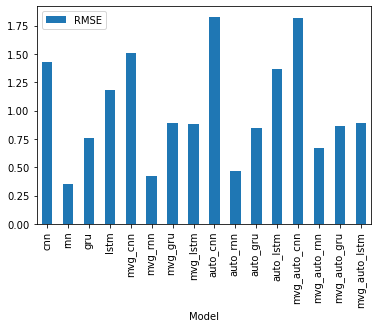

In [82]:
msedf.plot("Model", "RMSE", kind= "bar")